### Anomoly Detection: Codeup Curriculum Logs

    Created By: ChenChen Feng & Mijail Mariano

    Data Science, Kalpana Cohort

    25AUGUST2022

----

In [1]:
%matplotlib inline
import matplotlib as mlp
mlp.rcParams['figure.dpi'] = 300

# diasbling warning messages
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

# visualization libraries/modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# prepare module for data cleaning/manipulation
import prepare_final

# acquire module for acquiring the Codeup curriculum logs dataset
import acquire_final
from acquire_final import get_logs_dataset  

from datetime import datetime

import env
from env import user, password, host

### ``Data Acquisition & Preparation``

In [2]:
# acquiring curriculum dataset

df = get_logs_dataset()
df.head(3)

df shape: (900223, 11)


,date,time,endpoint,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0


In [3]:
# cleaning the log dataset

# acquiring endpoint targets
df = prepare_final.get_endpoint_targets(df)

# cleaning the dataset dates
df = prepare_final.clean_dates(df)

# mapping Codeup program ids to program names
df = prepare_final.map_program_id(df)

# cleaning duplicate values in program lesson/classes
df = prepare_final.clean_lesson(df)

# cleaning data types and null values in dataset 
df = prepare_final.clean_anomalies(df)

# treating null values
df = prepare_final.missing_values(df)

print(f'cleaned dataframe shape: {df.shape}')
df.head(3)

cleaned dataframe shape: (900222, 14)


,date,time,endpoint,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id,class,topic,program_type
datetime,,,,,,,,,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,0,0,FS_PHP_program
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,java-ii,0,FS_PHP_program
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,java-ii,object-oriented-programming,FS_PHP_program


In [4]:
# variable/feature information

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900222 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          900222 non-null  object 
 1   time          900222 non-null  object 
 2   endpoint      900222 non-null  object 
 3   user_id       900222 non-null  object 
 4   cohort_id     847329 non-null  float64
 5   ip            900222 non-null  object 
 6   name          847329 non-null  object 
 7   slack         847329 non-null  object 
 8   start_date    847329 non-null  object 
 9   end_date      847329 non-null  object 
 10  program_id    847329 non-null  object 
 11  class         900222 non-null  object 
 12  topic         900222 non-null  object 
 13  program_type  847329 non-null  object 
dtypes: float64(1), object(13)
memory usage: 103.0+ MB


----
## **``Students' Most Frequent Lessons Visited and Revisited: While Attending & Post Codeup``**

In [5]:
# creating log entries for attending & post Codeup

proxy_df = df.copy()
curr_df = df.copy()
grad_df = df.copy()

curr_df["end_date"] = pd.to_datetime(curr_df["end_date"], infer_datetime_format=True)
curr_df["start_date"] = pd.to_datetime(curr_df["start_date"], infer_datetime_format=True)

grad_df["end_date"] = pd.to_datetime(curr_df["end_date"], infer_datetime_format=True)
grad_df["start_date"] = pd.to_datetime(curr_df["start_date"], infer_datetime_format=True)

# setting a date column 
curr_df["logdate"] = curr_df.index
curr_df = curr_df.reset_index(drop = True)

grad_df["logdate"] = grad_df.index
grad_df = grad_df.reset_index(drop = True)

curr_df = curr_df[curr_df["logdate"] <= curr_df["end_date"]]
grad_df = grad_df[grad_df["logdate"] > grad_df["end_date"]]

# can now set the df index to log dates
curr_df = curr_df.set_index("logdate").sort_index()
grad_df = grad_df.set_index("logdate").sort_index()

proxy_df = proxy_df.apply(lambda x: x.str.strip() if isinstance(x, str) else x).replace(0, None)
curr_df = curr_df.apply(lambda x: x.str.strip() if isinstance(x, str) else x).replace(0, None)
grad_df = grad_df.apply(lambda x: x.str.strip() if isinstance(x, str) else x).replace(0, None)

print(f'attending df shape: {curr_df.shape}')
print(f'post graduation df shape: {grad_df.shape}')

# curr_df.head()

attending df shape: (647197, 14)
post graduation df shape: (200132, 14)


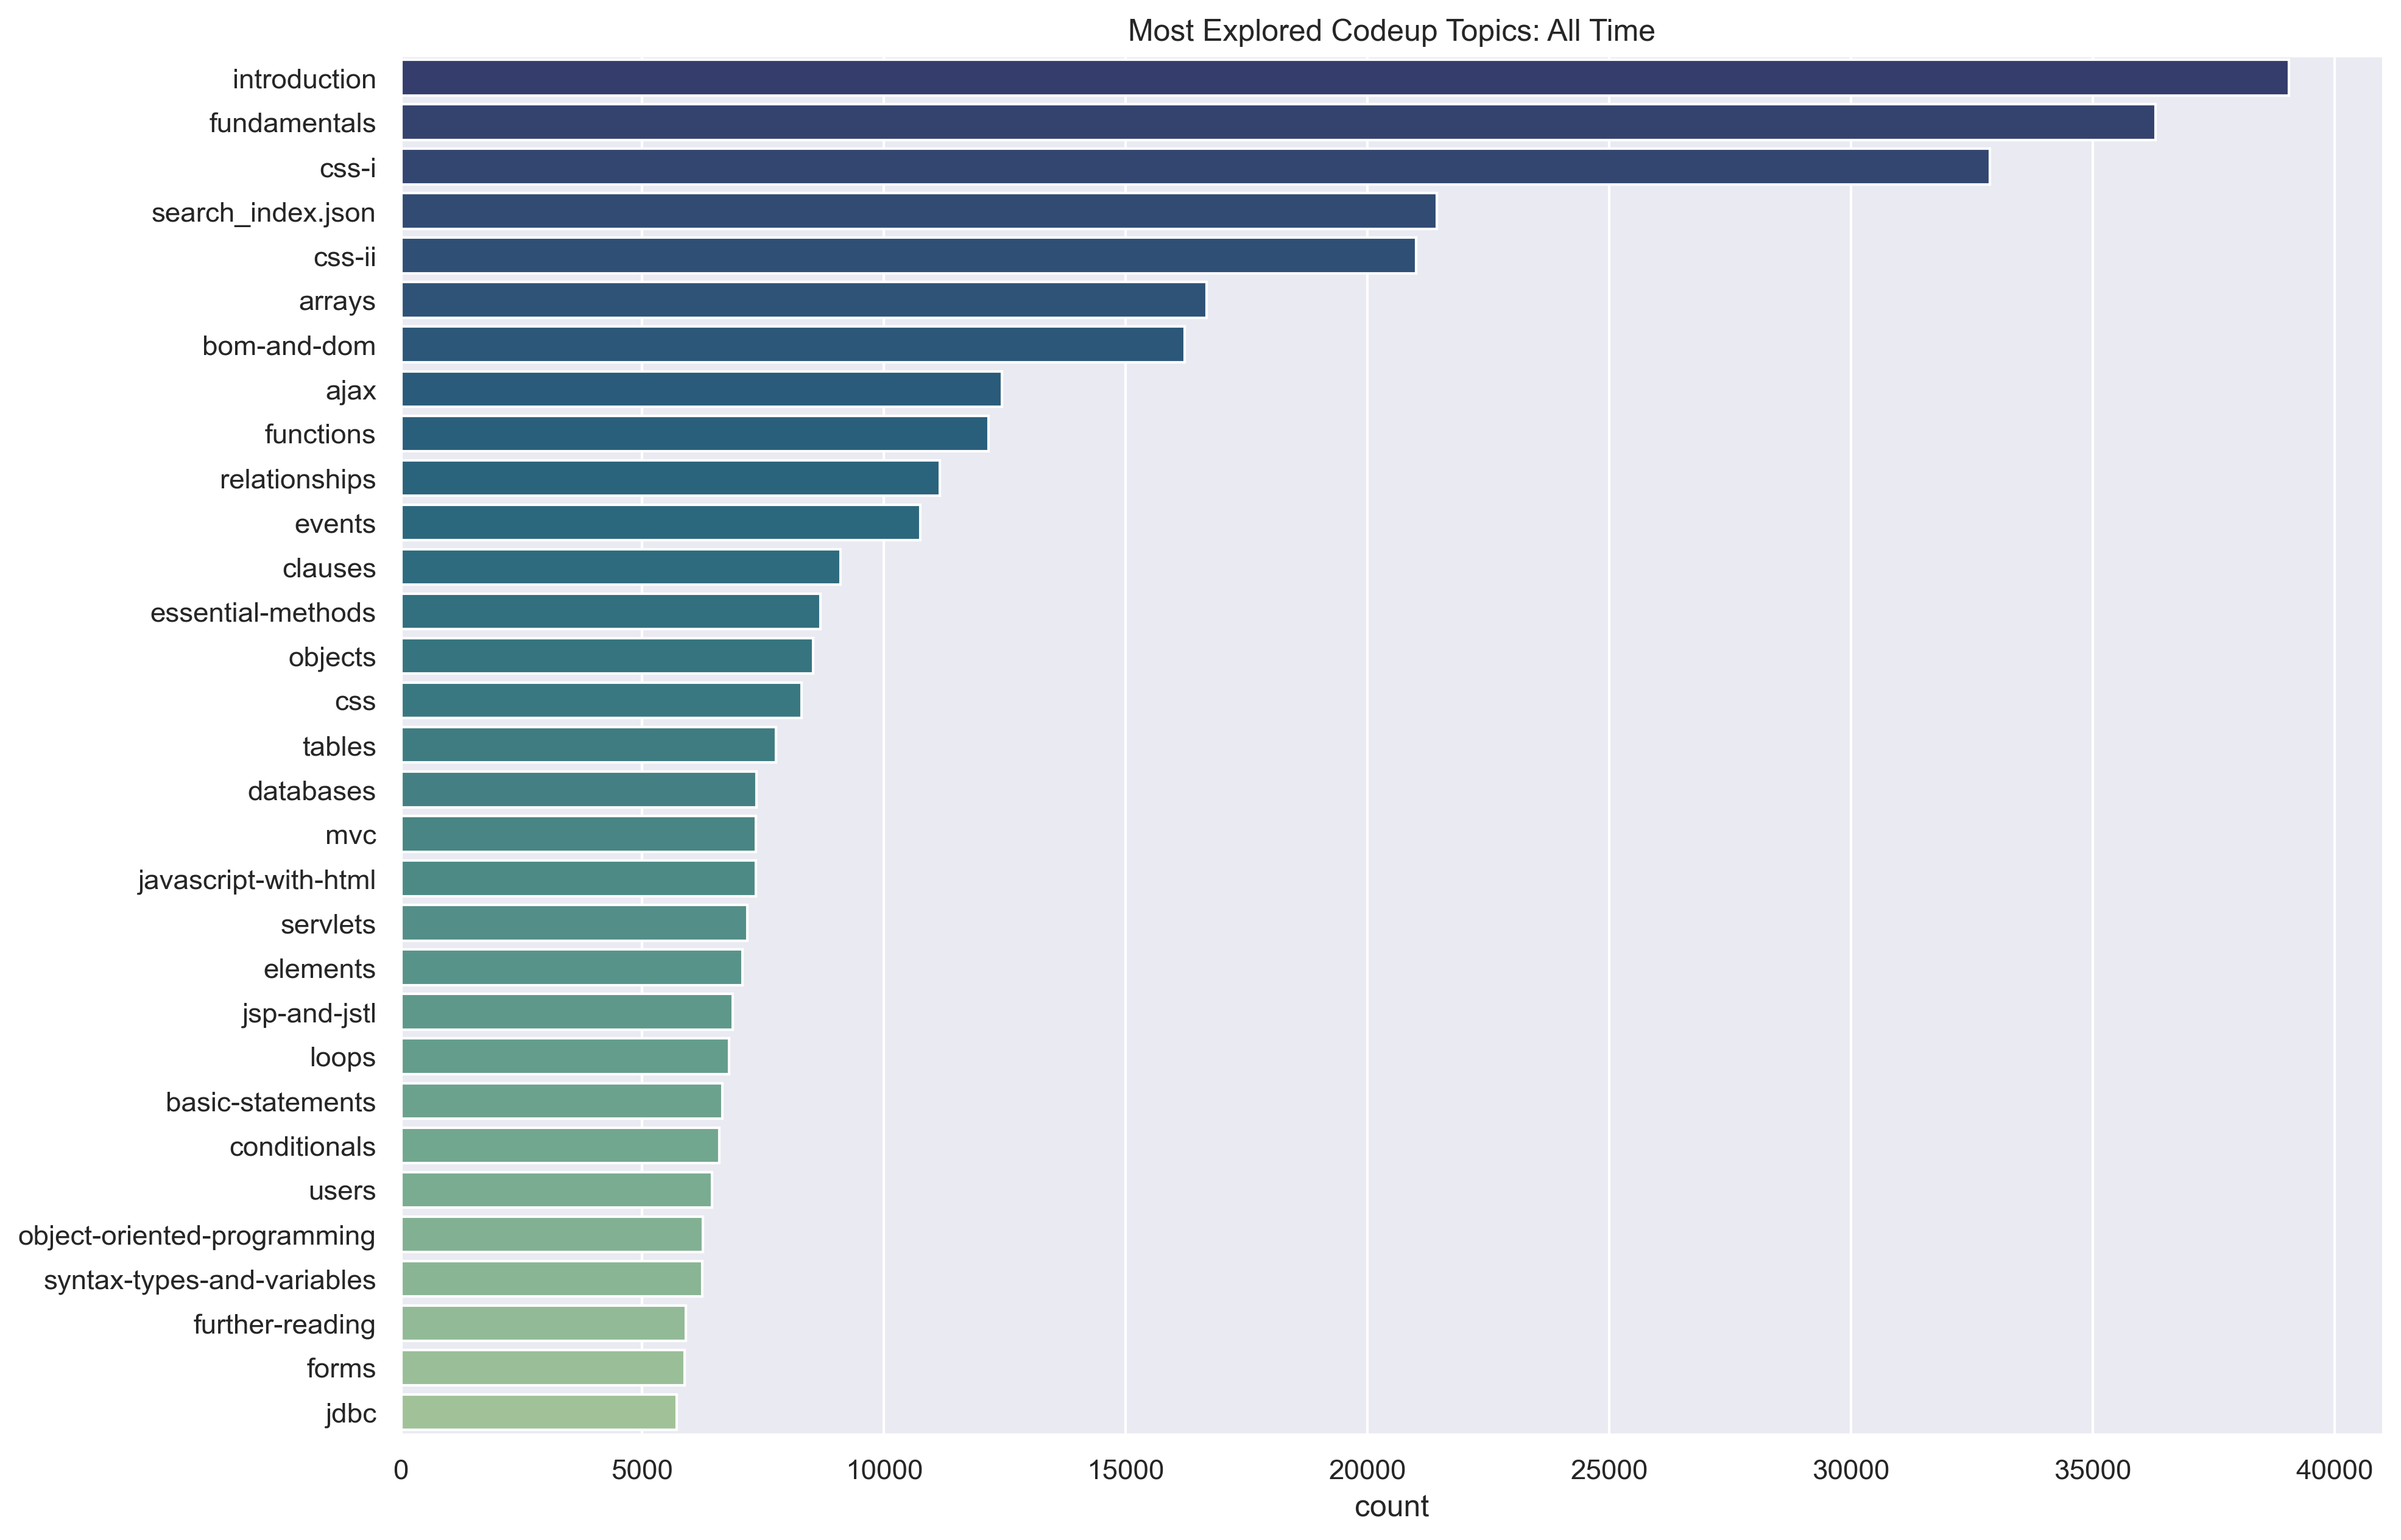

In [6]:
prepare_final.return_most_visited_lessons_all_time(proxy_df)

#### **<u>``While Attending Codeup:``</u>**

In [7]:
# top 5: all time

prepare_final.value_counts_and_frequencies(df["class"])

,Count,Percentage
javascript-i,118723,0.13
html-css,84935,0.09
mysql,82848,0.09
jquery,60869,0.07
spring,58603,0.07
java-iii,56733,0.06


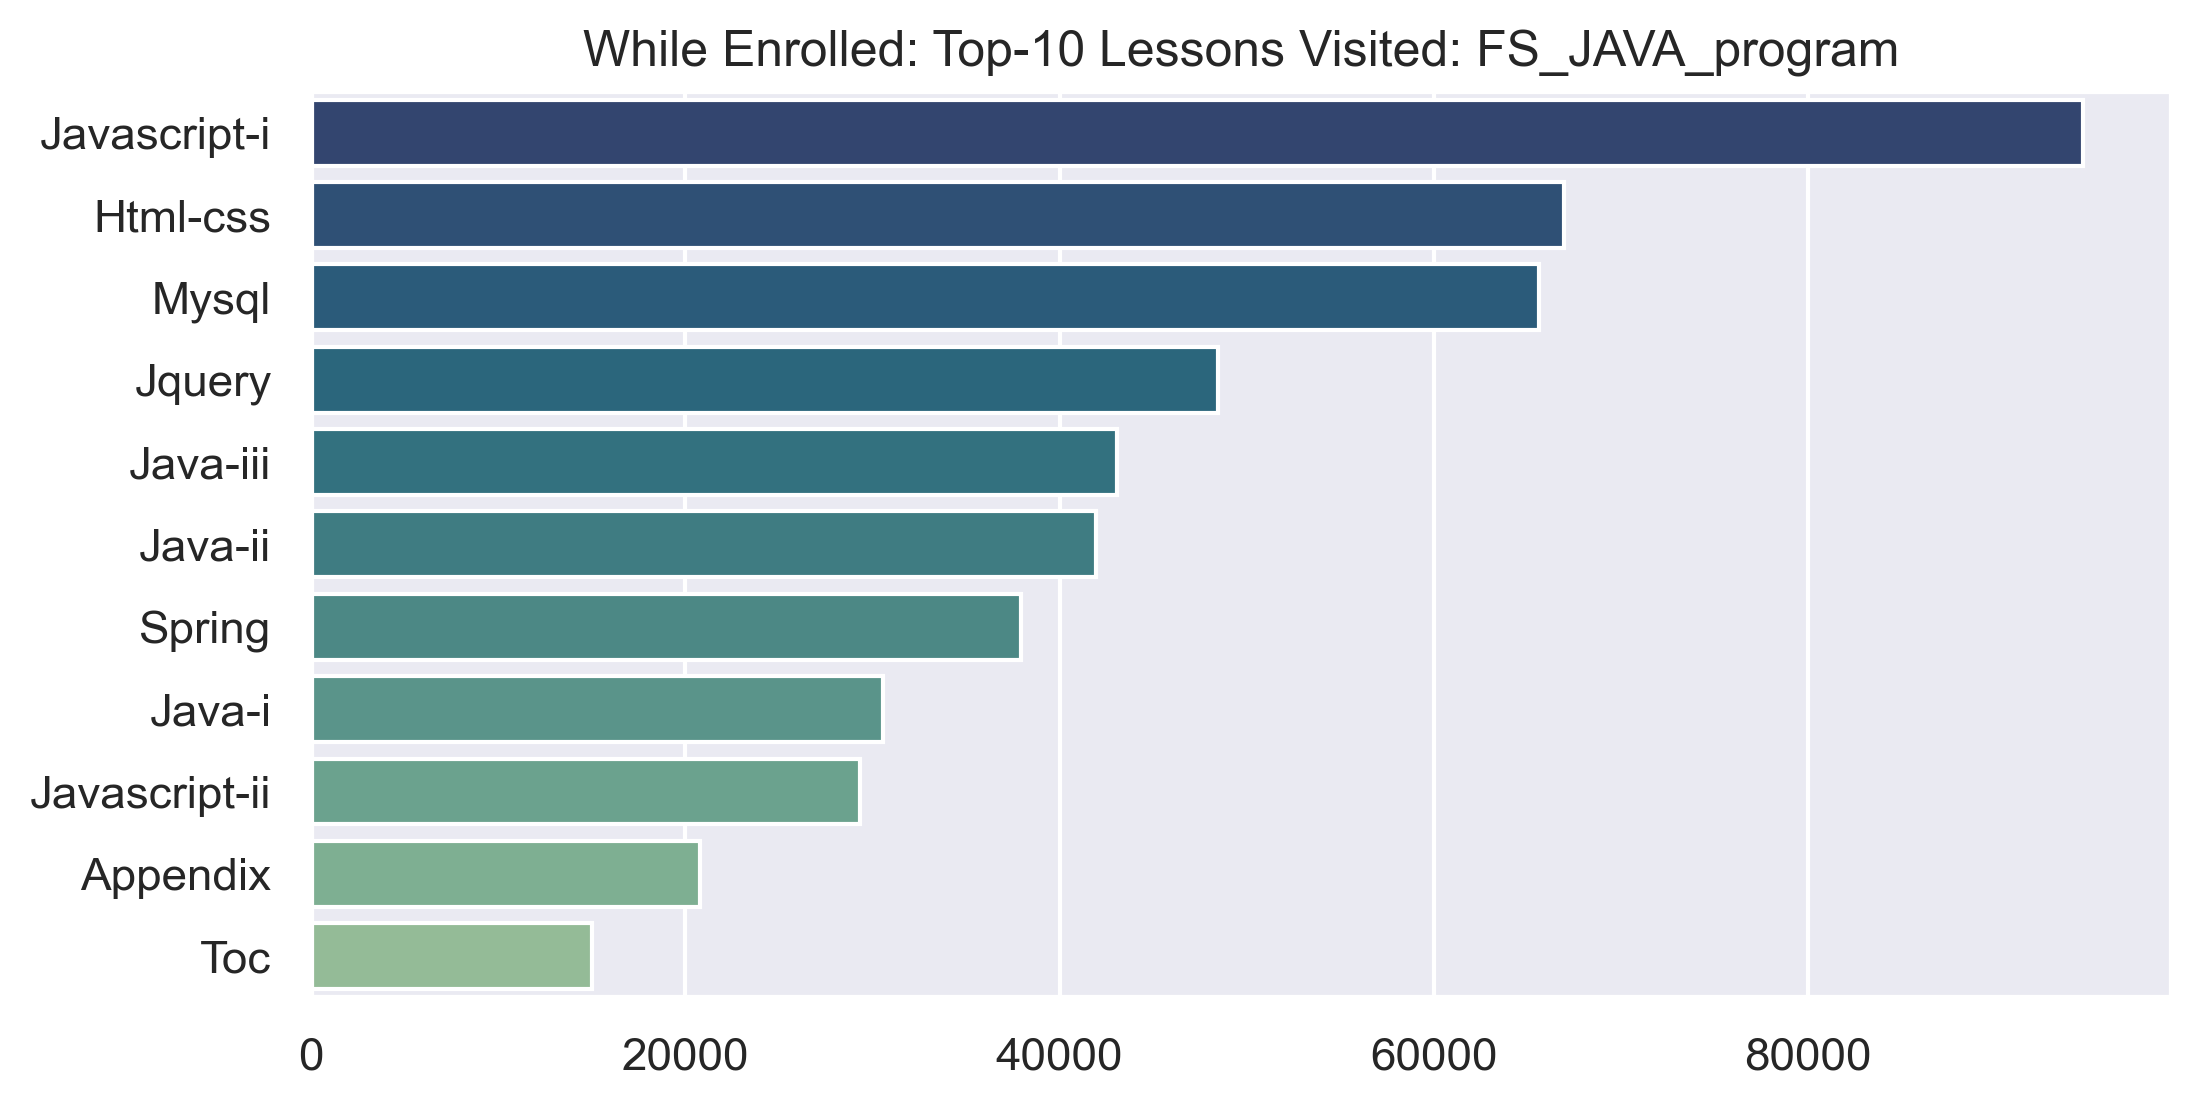

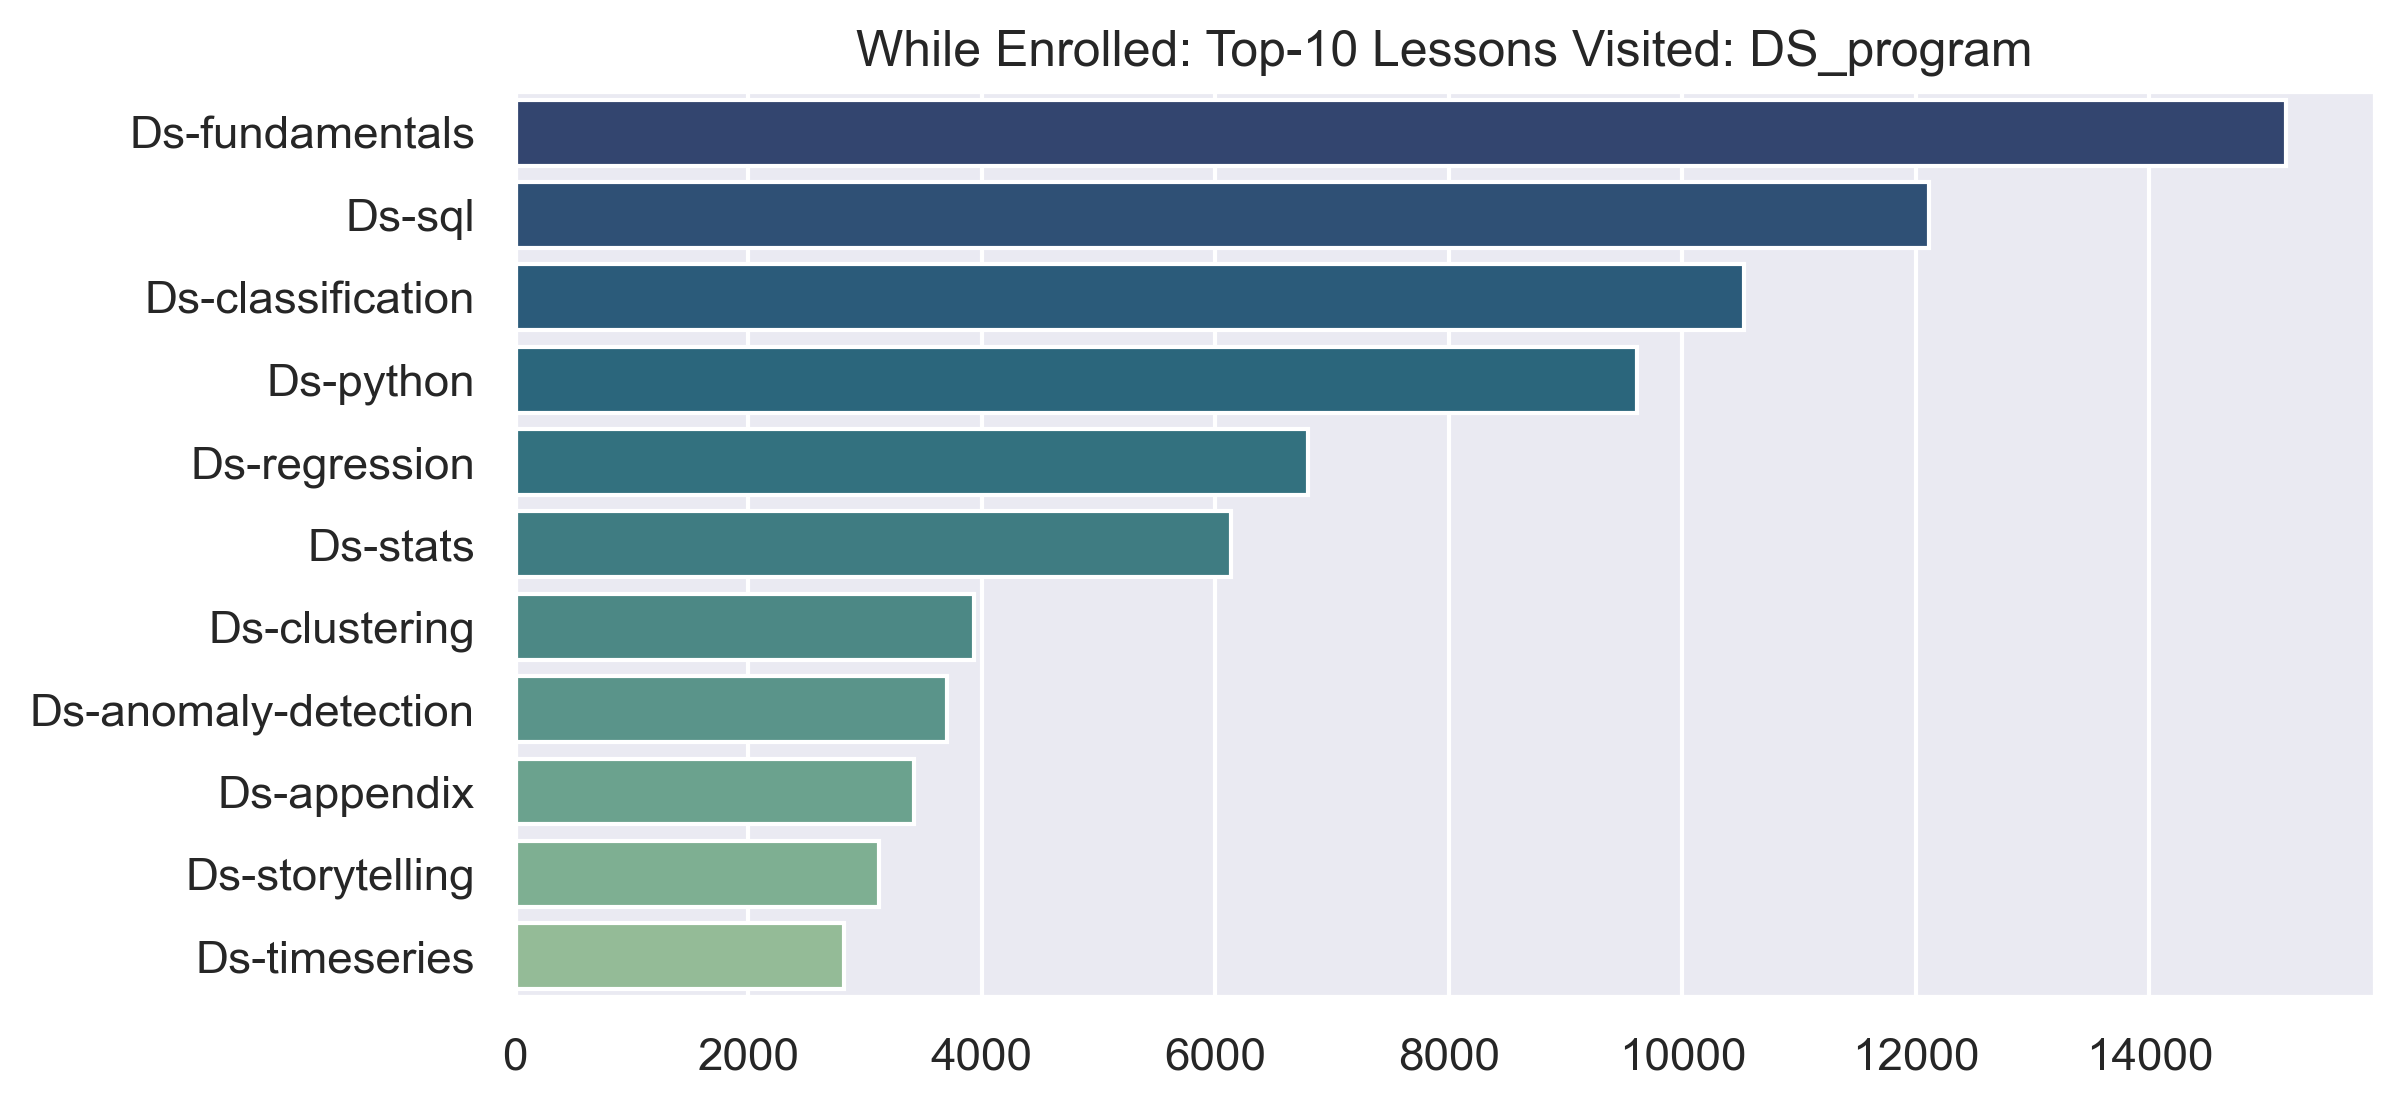

In [8]:
prepare_final.most_current_visits(curr_df)

In [9]:
# Full-Stack Java Program
print('Codeup Program: Full Stack: Java')
prepare_final.value_counts_and_frequencies(curr_df[curr_df["program_type"] == 'FS_JAVA_program']["class"])

Codeup Program: Full Stack: Java


,Count,Percentage
javascript-i,94676,0.18
html-css,66968,0.13
mysql,65629,0.12
jquery,48477,0.09
java-iii,43094,0.08
java-ii,41966,0.08


In [10]:
# Data Science Program
print('Codeup Program: Data Science')
prepare_final.value_counts_and_frequencies(curr_df[curr_df["program_type"] == 'DS_program']["class"])

Codeup Program: Data Science


,Count,Percentage
ds-fundamentals,15171,0.18
ds-sql,12116,0.14
ds-classification,10524,0.12
ds-python,9610,0.11
ds-regression,6797,0.08
ds-stats,6133,0.07


#### **<u>``Post Codeup:``</u>**

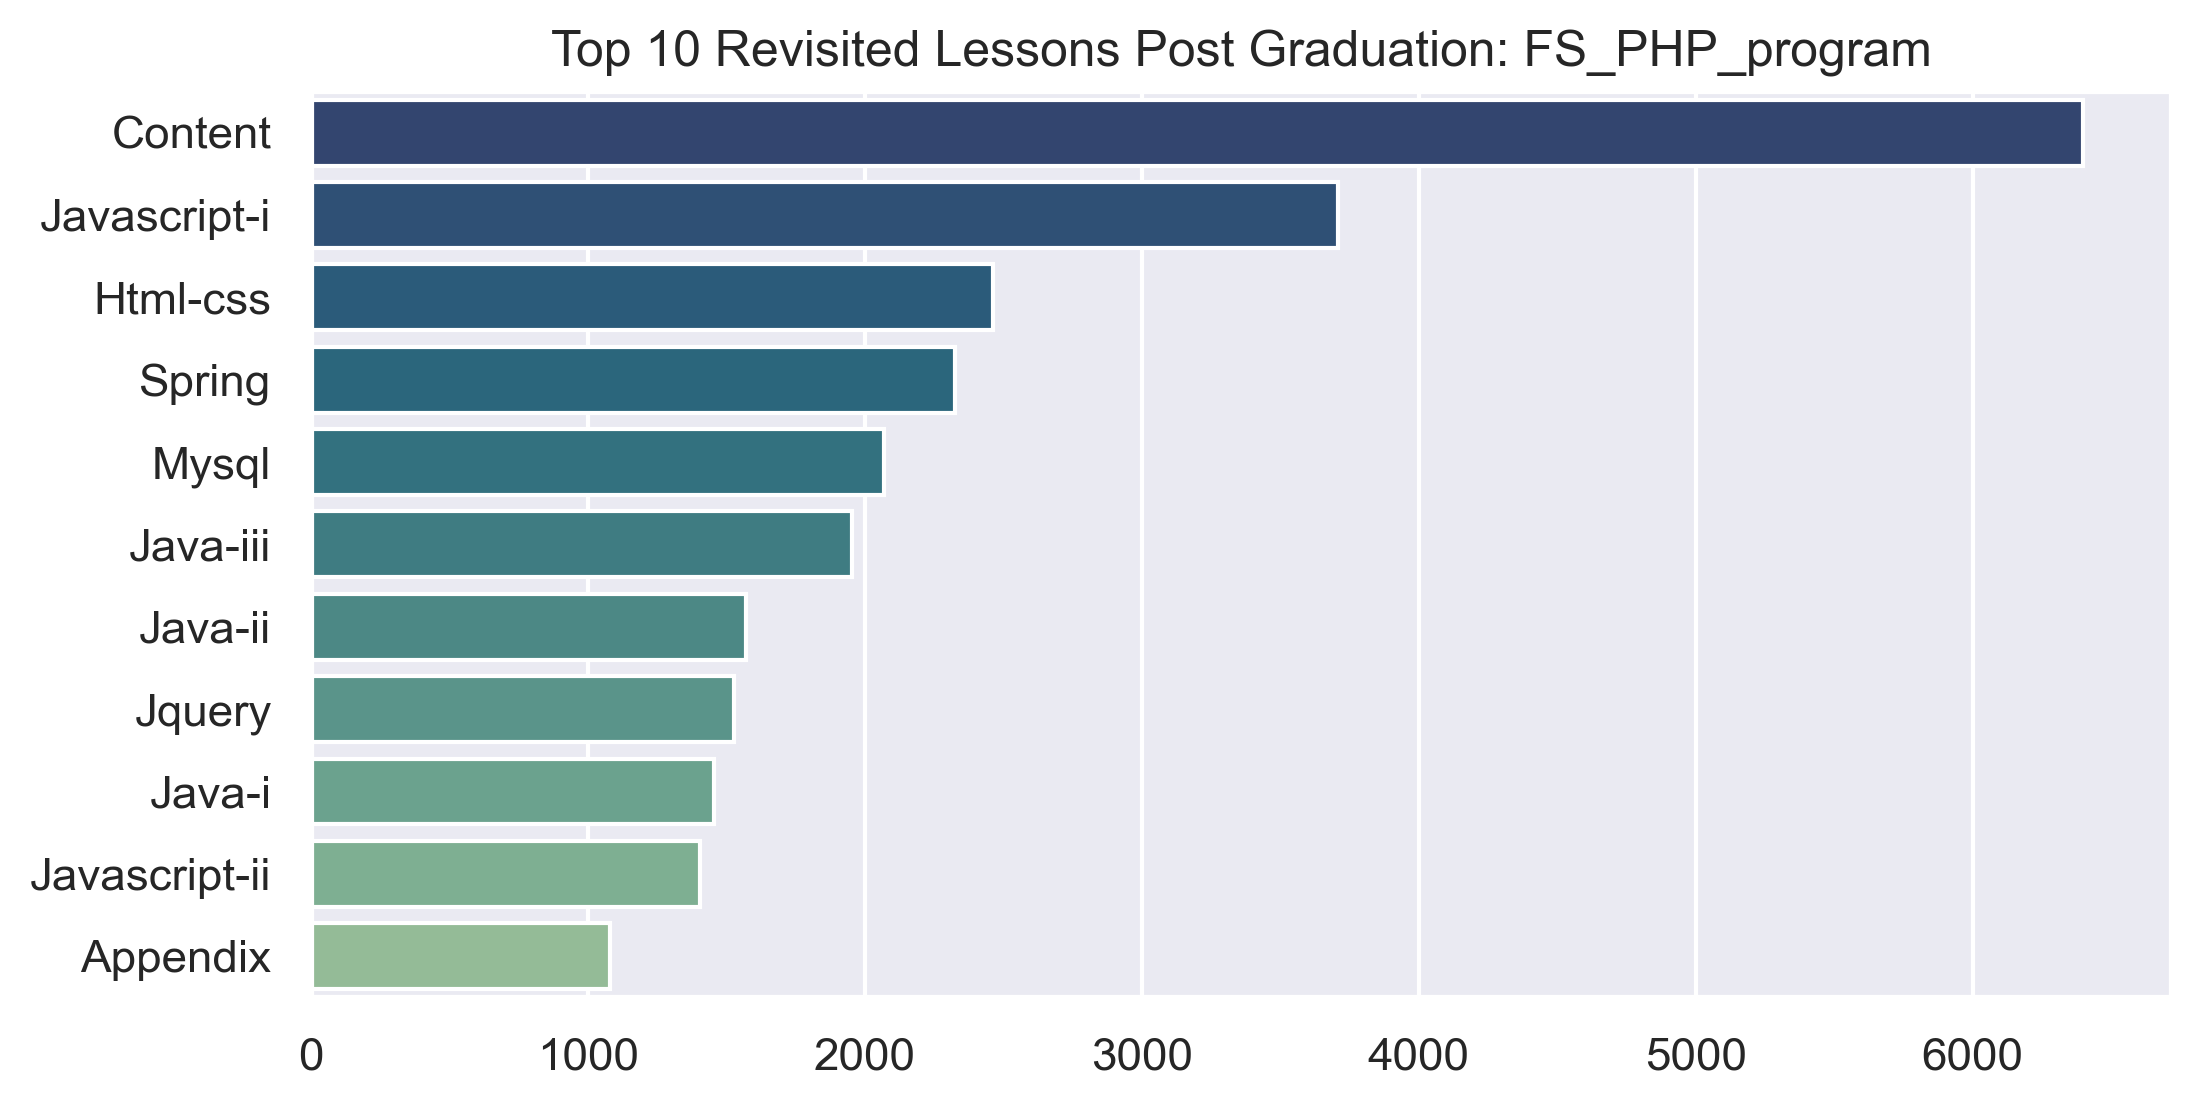

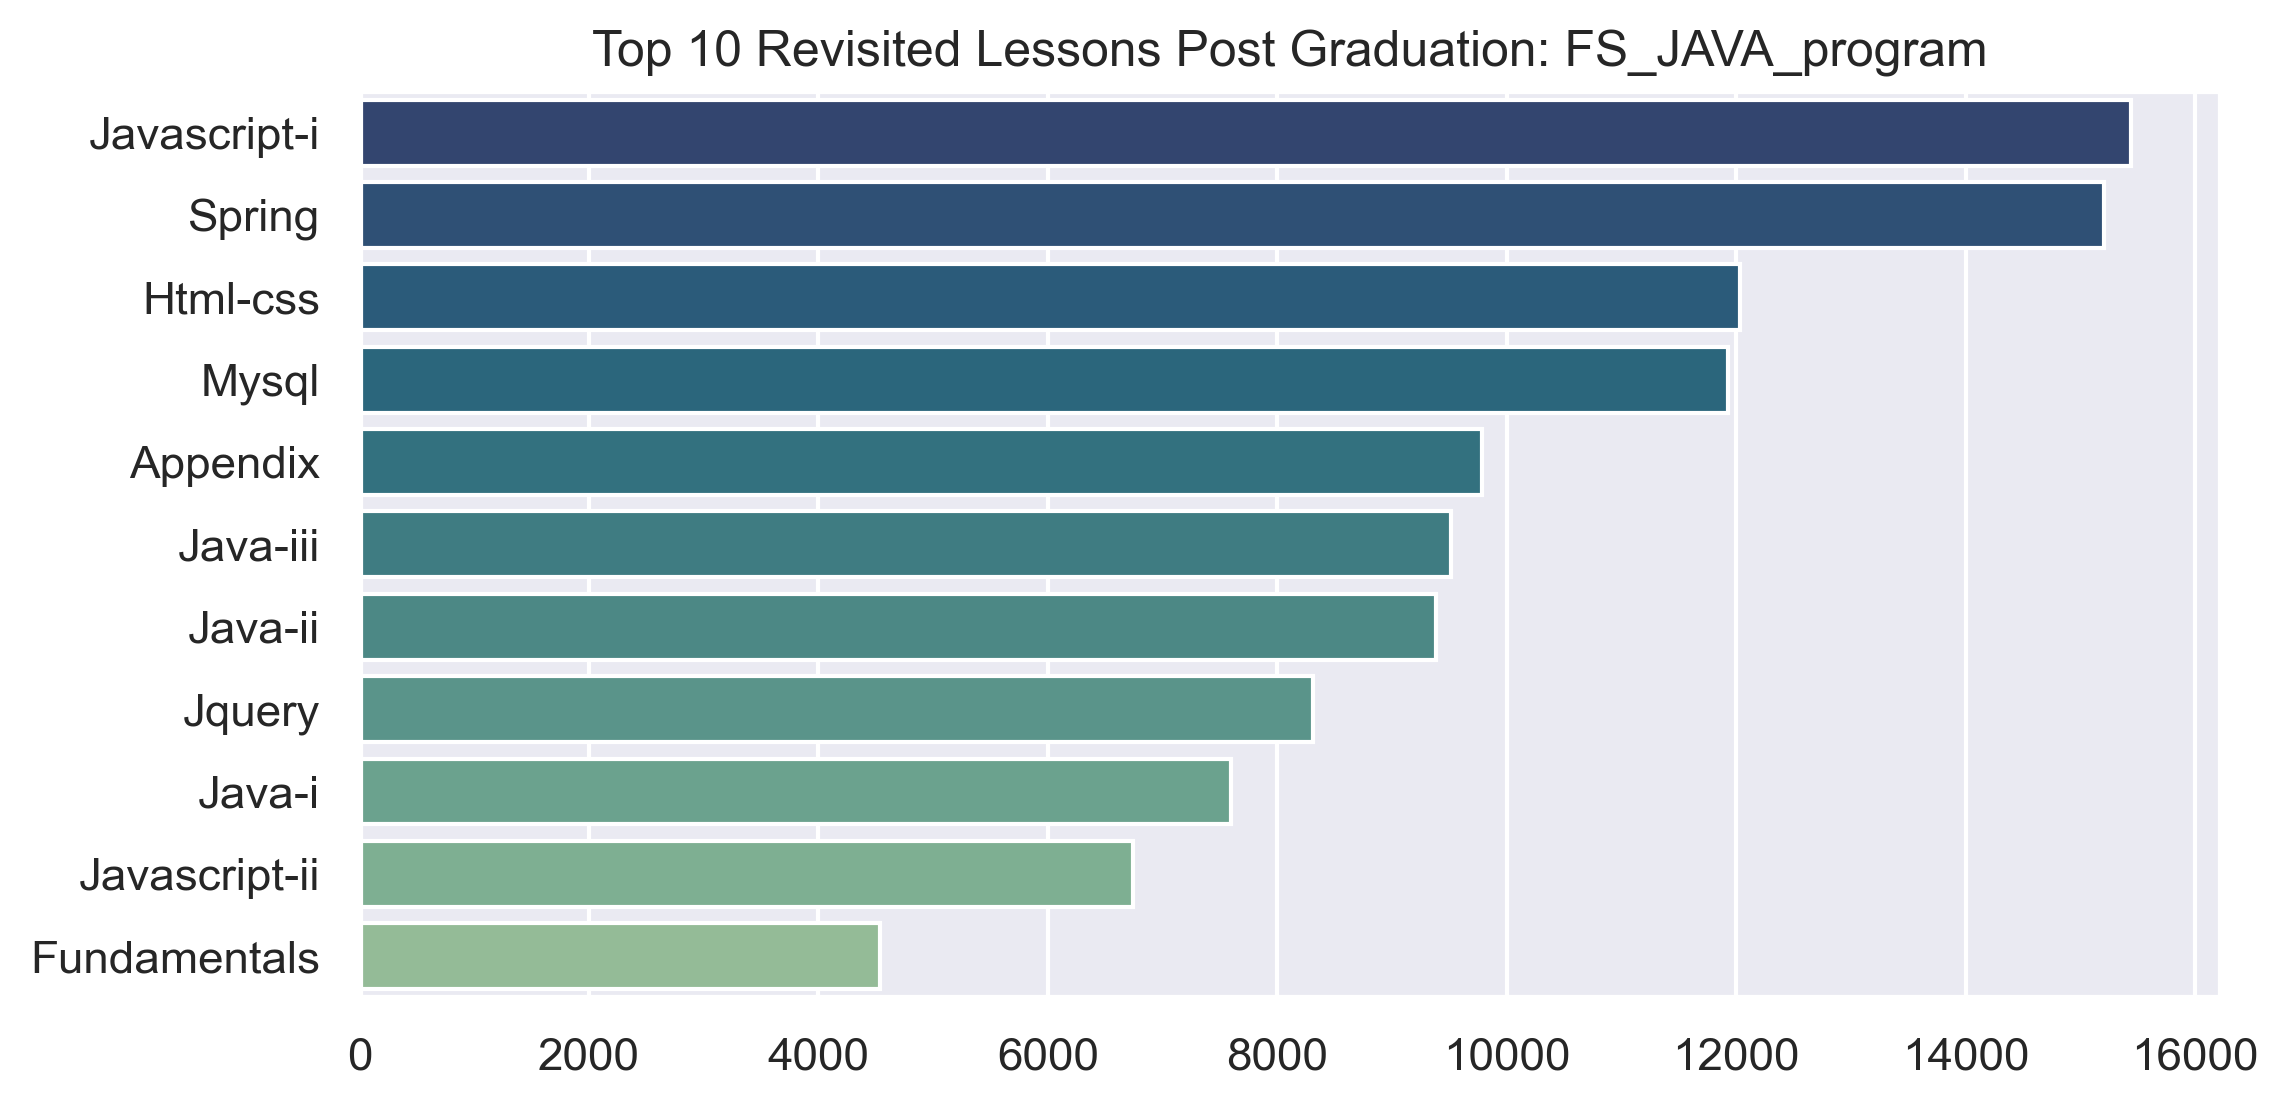

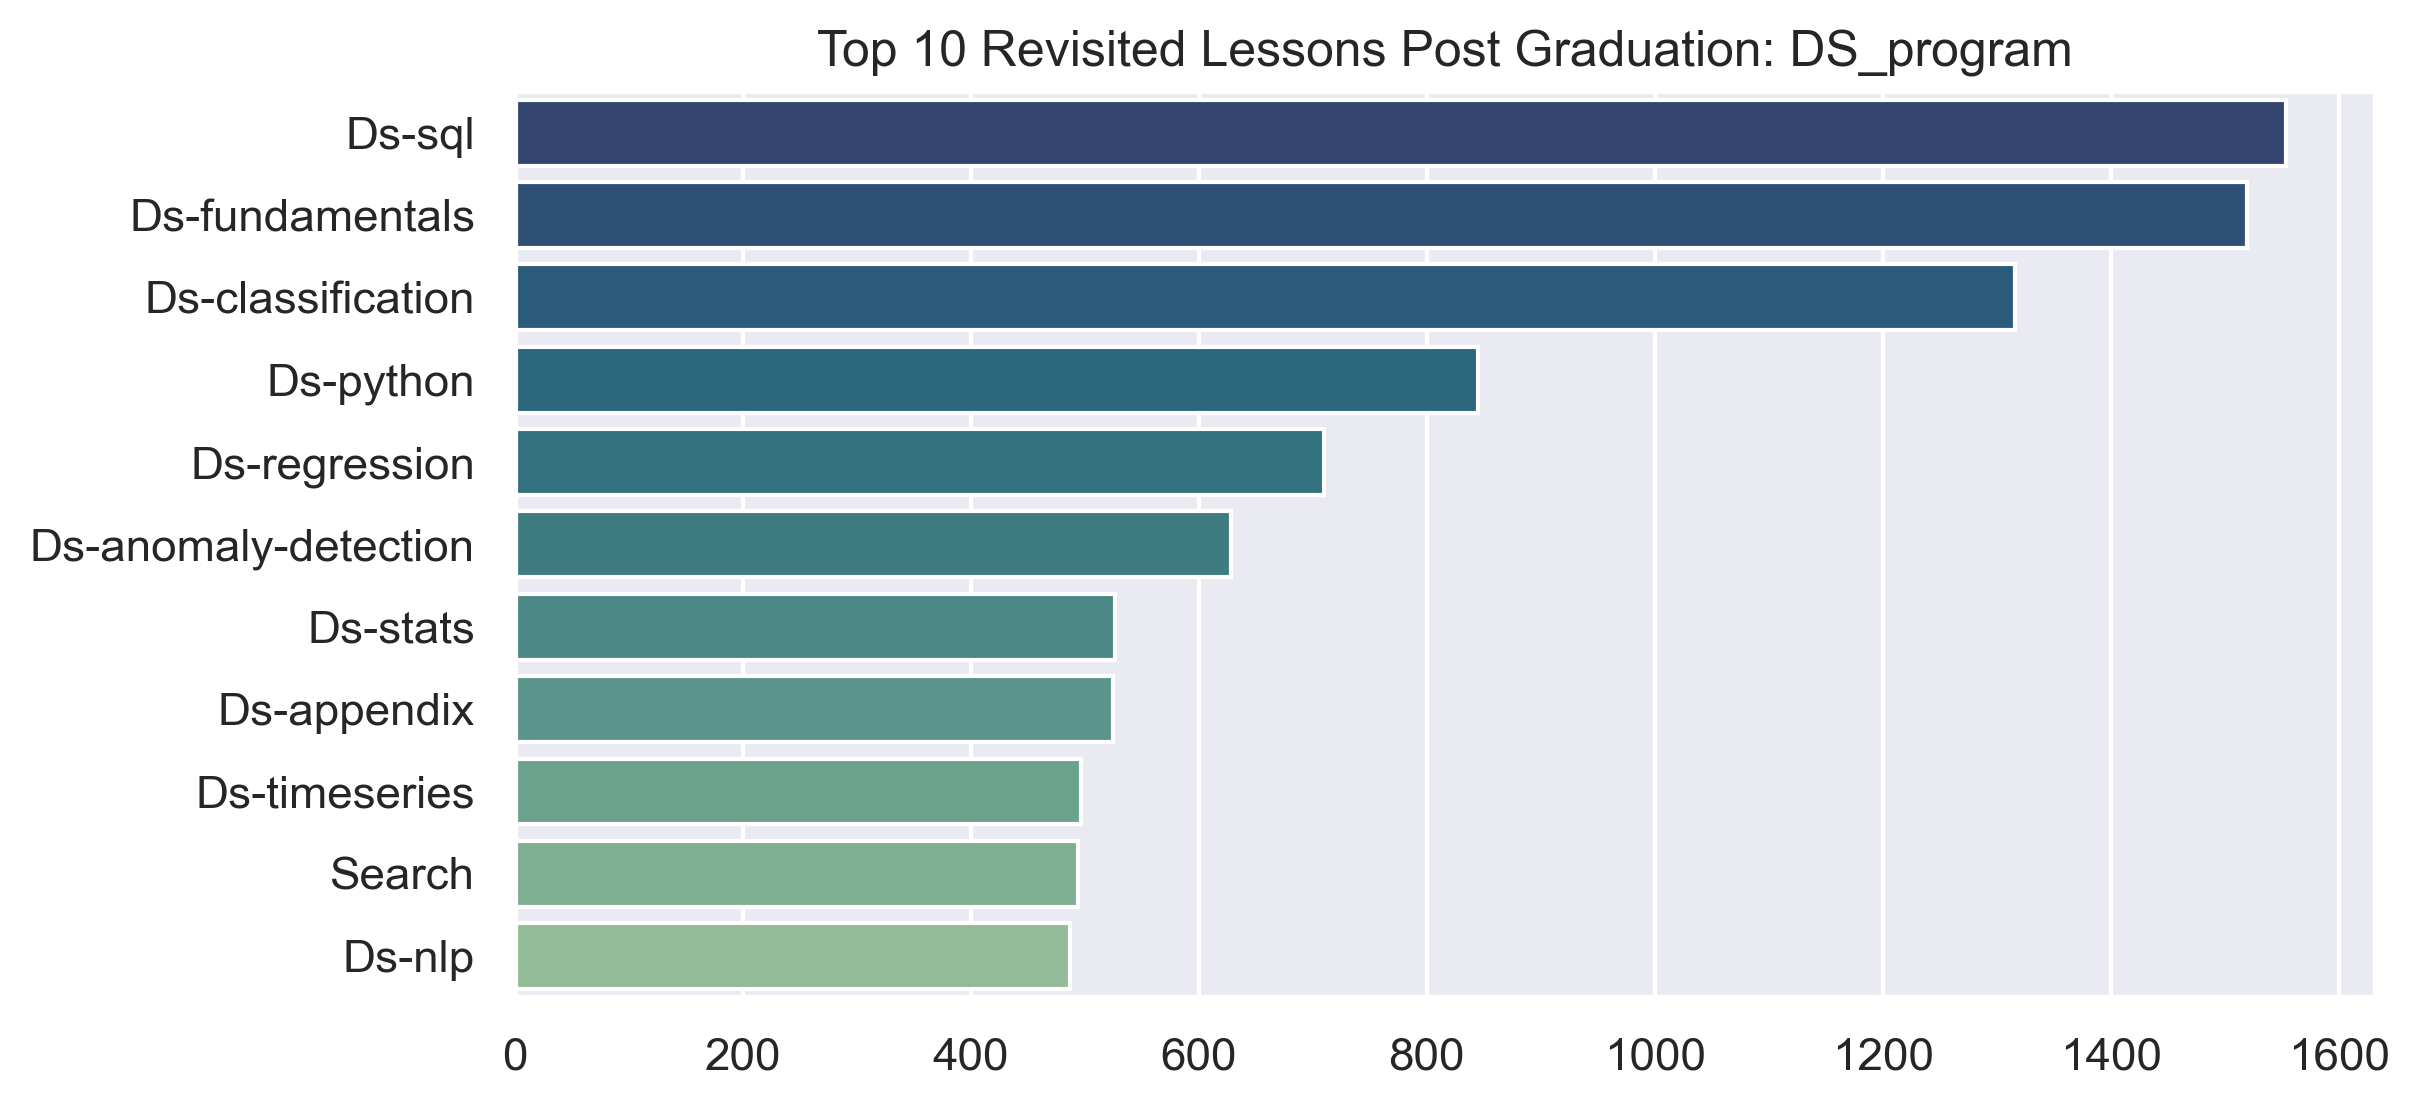

In [11]:
prepare_final.most_grad_revisits(grad_df)

#### **``What about specific topics?``**

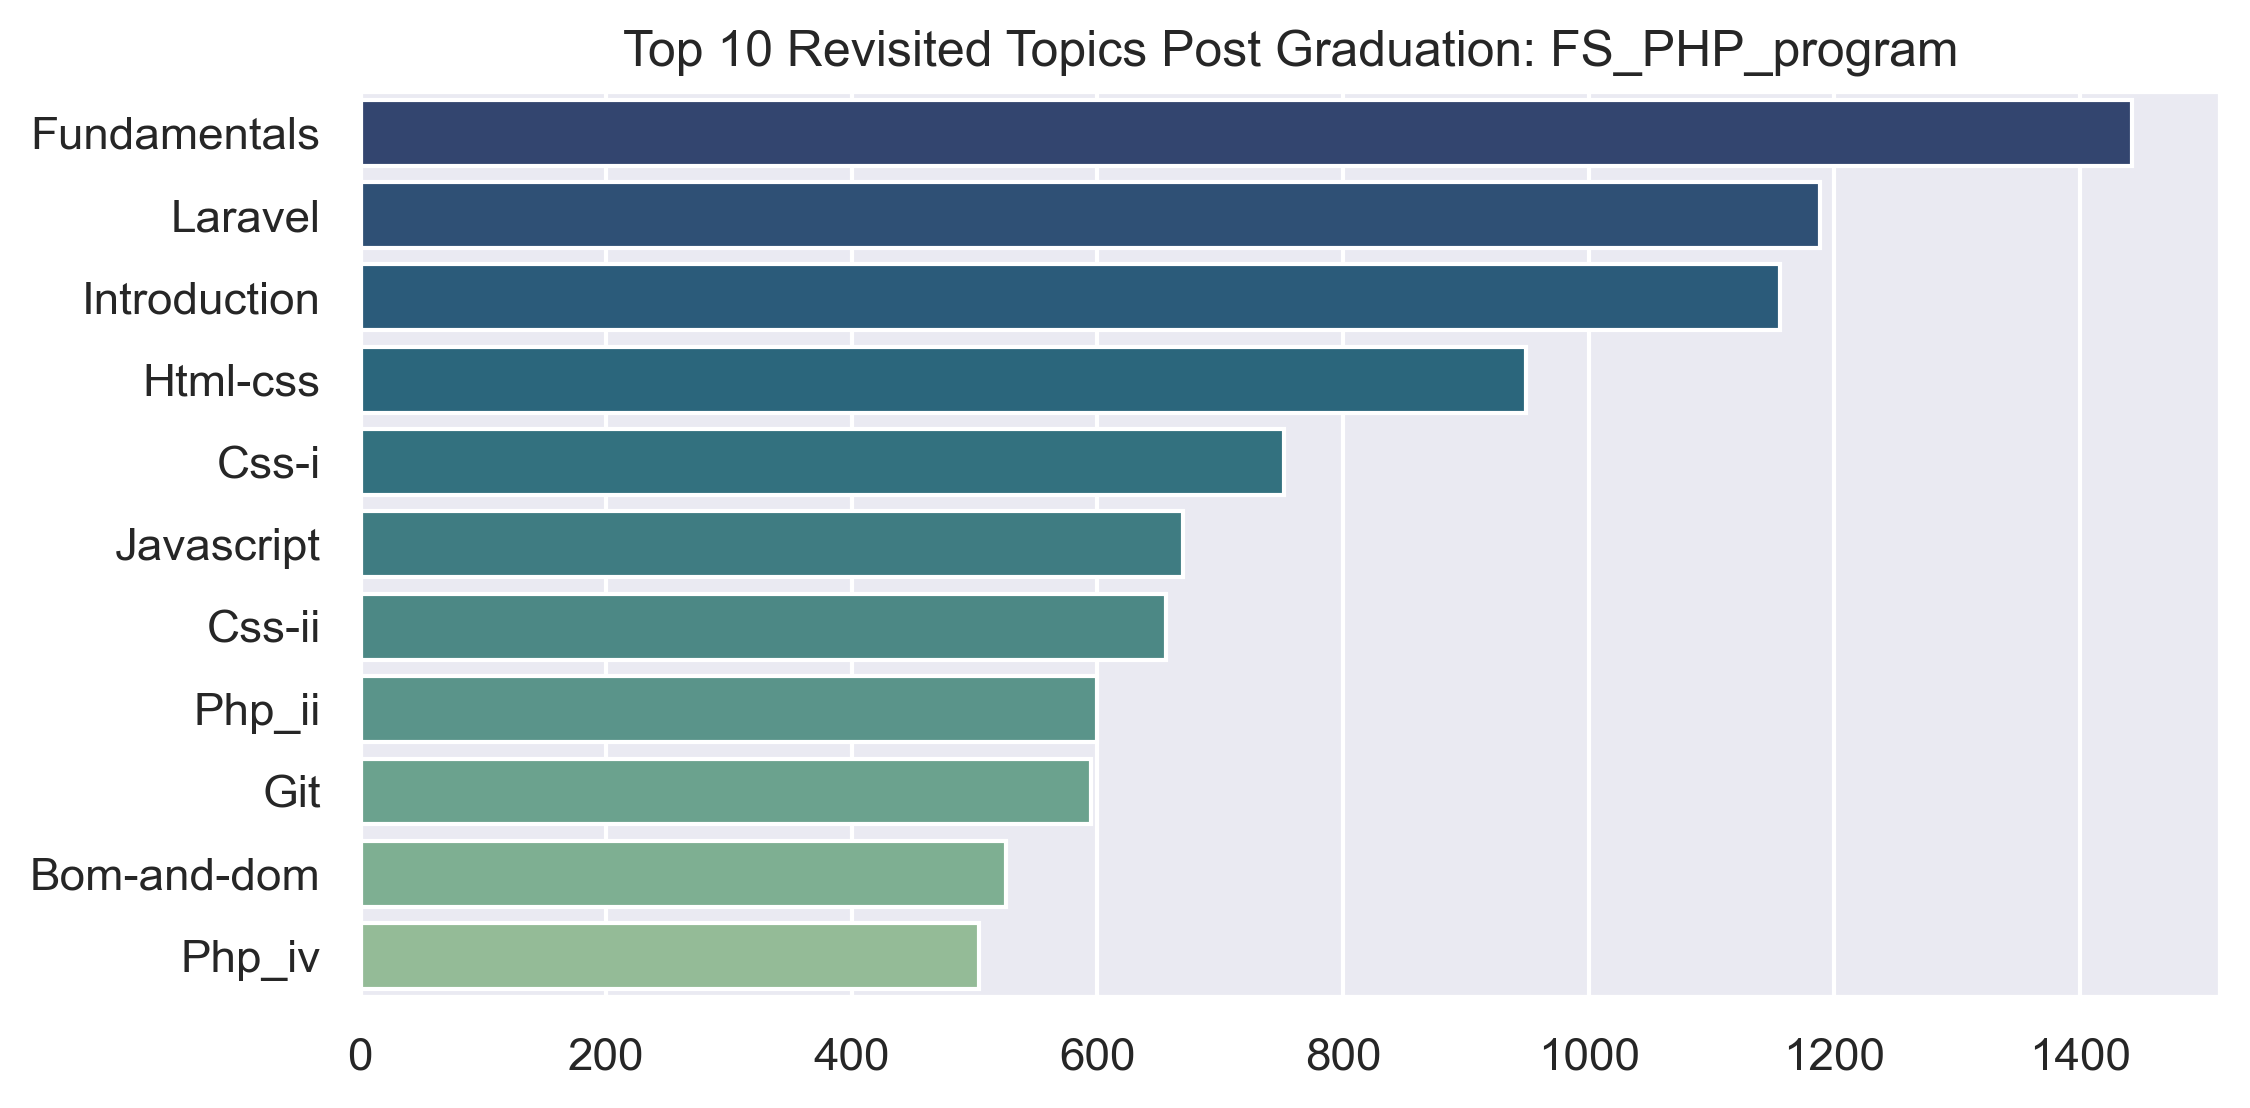

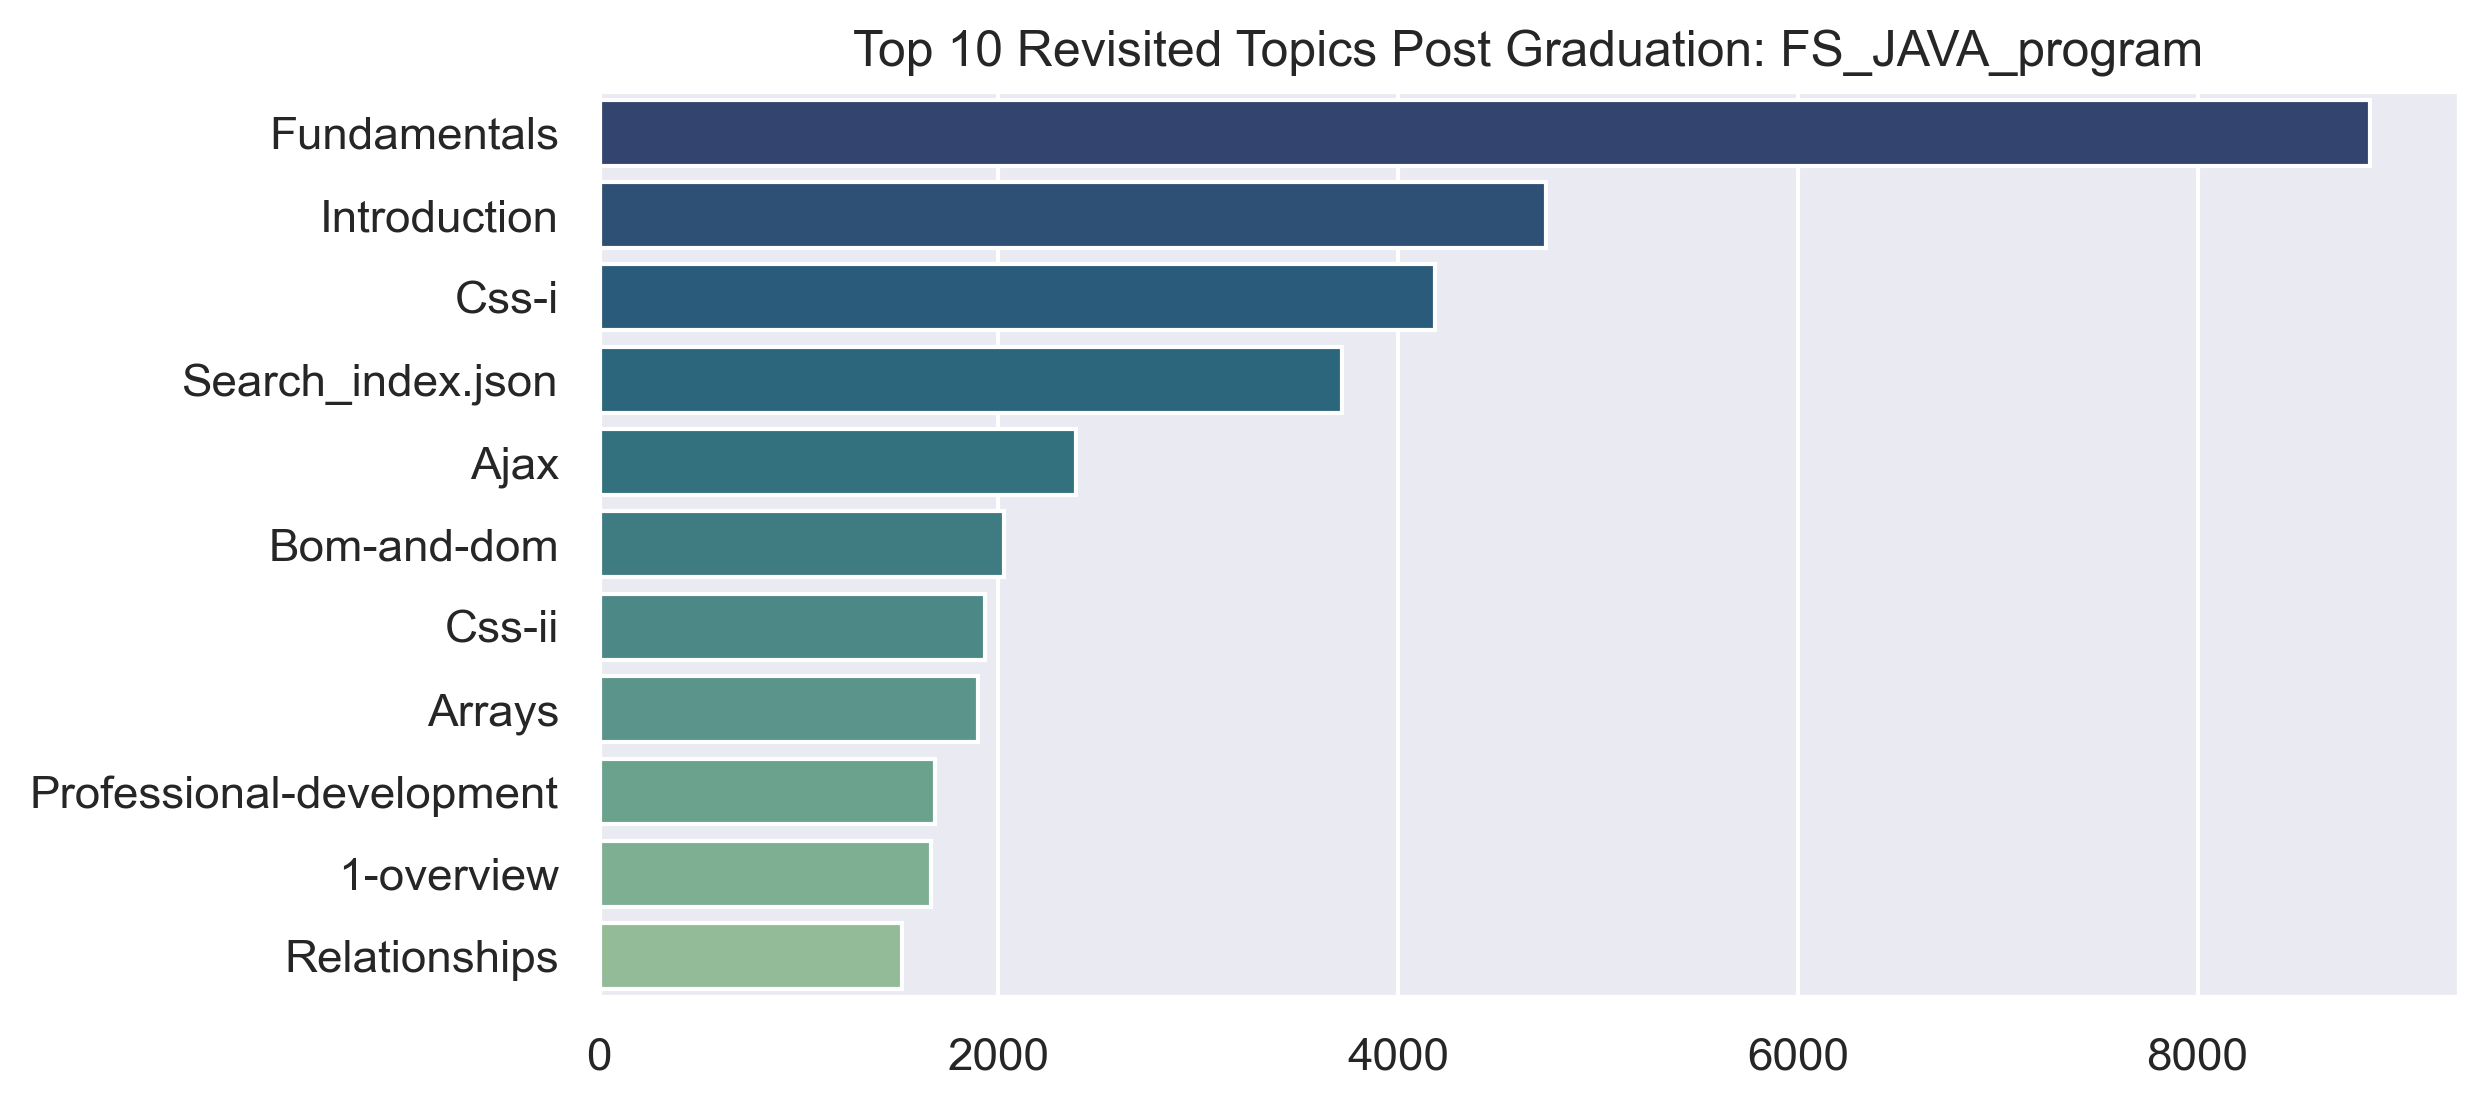

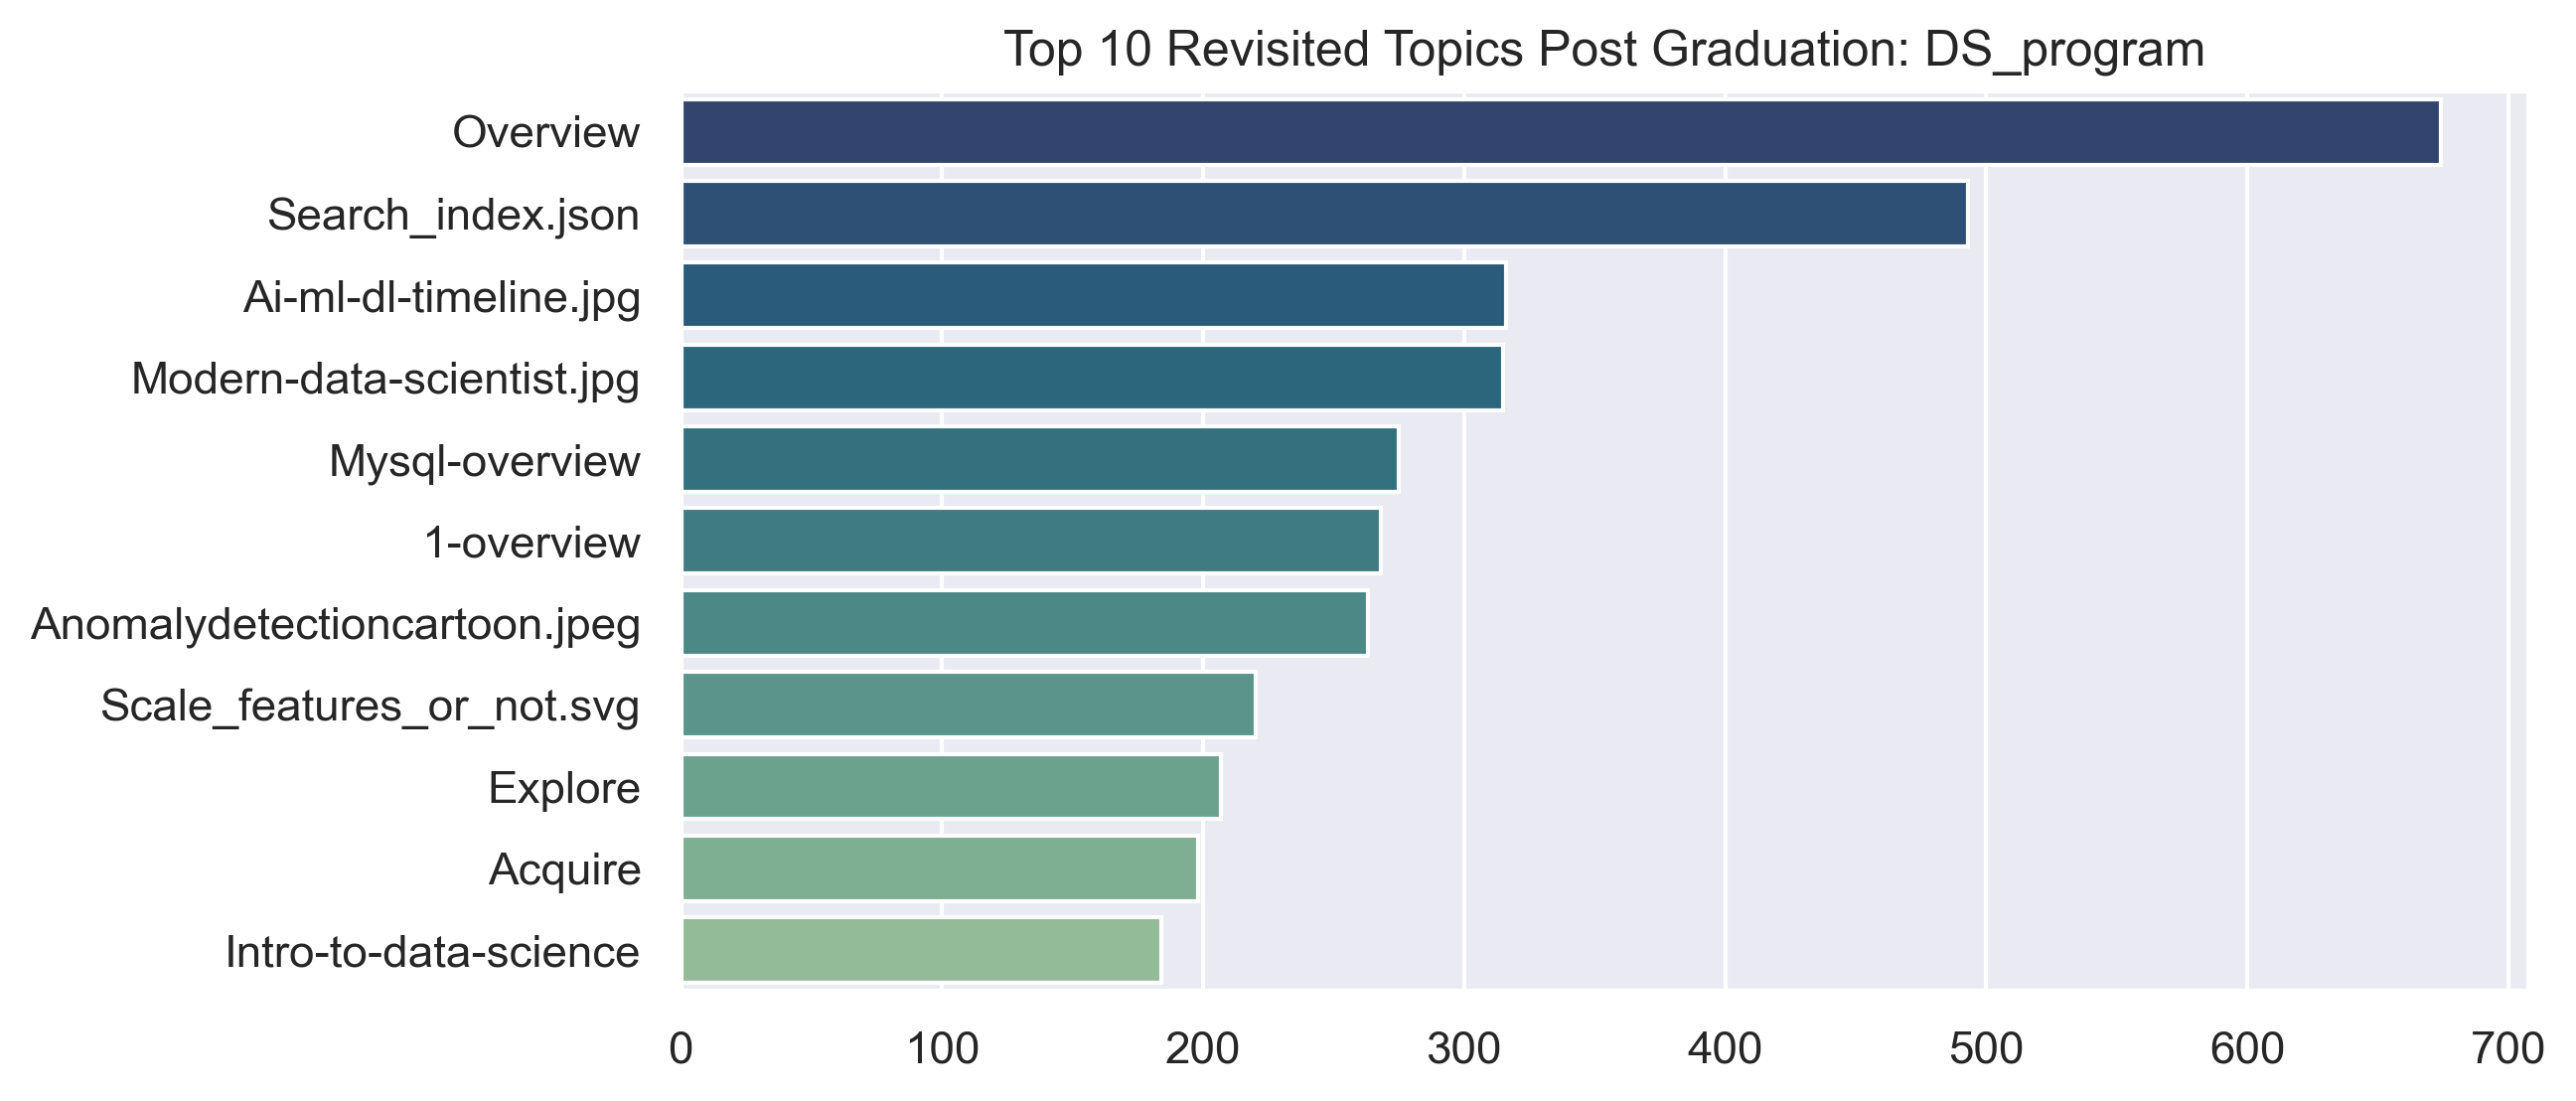

In [12]:
prepare_final.most_grad_revisits_topics(grad_df)

----
### ``Post Codeup: Alumni Revisits``

In [13]:
# Codeup Alumni: least explored/revisited lessons & topics
lst = grad_df["program_type"].unique().tolist()
for program in lst:
    print(f'Codeup Program: {program}')
    print(f'Least Frequent Class/Module Visited:\n---------------------------------\n{grad_df[grad_df["program_type"] == program]["class"].value_counts().tail()}\n')
    print(f'Least Frequent Topic Visited:\n---------------------------------\n{grad_df[grad_df["program_type"] == program]["topic"].value_counts().tail()}')
    print()

Codeup Program: FS_PHP_program
Least Frequent Class/Module Visited:
---------------------------------
11._DistributedML.md                     1
2.00.02_Navigating_Excel                 1
2.00.05_Charts_PivotTables_Sparklines    1
2.02.00_Inferential_Stats                1
ajax-api-request.html                    1
Name: class, dtype: int64

Least Frequent Topic Visited:
---------------------------------
threads                    1
2.4-more-excel-features    1
1-tidy-data                1
data-viz-references        1
loops.html                 1
Name: topic, dtype: int64

Codeup Program: FS_JAVA_program
Least Frequent Class/Module Visited:
---------------------------------
habn                            1
5.04.04_LeastAngleRegression    1
11._DistributedML               1
2-sql                           1
9_Anomaly_Detection             1
Name: class, dtype: int64

Least Frequent Topic Visited:
---------------------------------
review                 1
2.7-correlation        1
598dc4

----
### **<u>``Lessons Least Accessed/Explored``</u>**

In [14]:
# While Attending Codeup: least accessed/explored lessons & topics

lst = curr_df["program_type"].unique().tolist()
for program in lst:
    print(f'Codeup Program: {program}')
    print(f'Least Frequent Class/Module Visited:\n---------------------------------\n{curr_df[curr_df["program_type"] == program]["class"].value_counts().tail()}\n')
    print(f'Least Frequent Topic Visited:\n---------------------------------\n{curr_df[curr_df["program_type"] == program]["topic"].value_counts().tail()}')
    print()

Codeup Program: FS_JAVA_program
Least Frequent Class/Module Visited:
---------------------------------
3.2-databases           1
3.4-basic-statements    1
3.6-functions           1
3.9-temporary-tables    1
css                     1
Name: class, dtype: int64

Least Frequent Topic Visited:
---------------------------------
twitter.html    1
9.3-joins       1
120             1
apendix         1
PreWork         1
Name: topic, dtype: int64

Codeup Program: DS_program
Least Frequent Class/Module Visited:
---------------------------------
End_to_End_clustering    1
end_to_end_clustering    1
4.2-compare-means        1
DataToAction_v2.jpg      1
statistics-assessment    1
Name: class, dtype: int64

Least Frequent Topic Visited:
---------------------------------
6.1-parametric-modeling        1
getUserDetails                 1
4-navigating-the-filesystem    1
cls                            1
explore-old                    1
Name: topic, dtype: int64



-----
## ``Cohort Exploration: Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?``

**<u>Programs explored:</u>**

- Data Science
- Full Stack: PHP
- Full Stack: Java

#### <u>``Data Science Program:``</u>

In [15]:
# create a dataframe for ds
ds = df[df.program_id == 3]

# due to the imbalaced value counts, here I will only compare top three cohorts referred to classes
ds1 = ds[(ds.name == 'Darden')|(ds.name =='Bayes')|(ds.name =='Curie')]
pd.DataFrame(ds1.name.value_counts()).rename(columns = {"name": "total_logs"})

,total_logs
Darden,32015
Bayes,26538
Curie,21581


In [16]:
# which one? (chen chen)

In [17]:
# comparing the first five (5) lessons/classes

ds1['class'].replace(0, None).value_counts(dropna = True).head(6)

ds-fundamentals      10509
ds-sql                9521
ds-classification     8910
ds-python             7831
ds-regression         6348
ds-stats              5647
Name: class, dtype: int64

In [18]:
# comparing the first five (5) lessons/classes

ds1['class'].value_counts().head(6)

ds-fundamentals      10509
ds-sql                9521
ds-classification     8910
ds-python             7831
0                     6659
ds-regression         6348
Name: class, dtype: int64

#### ``Visualizing the Top-5 Lessons/Classes Explored Amongst Top-3 Data Science Cohorts``

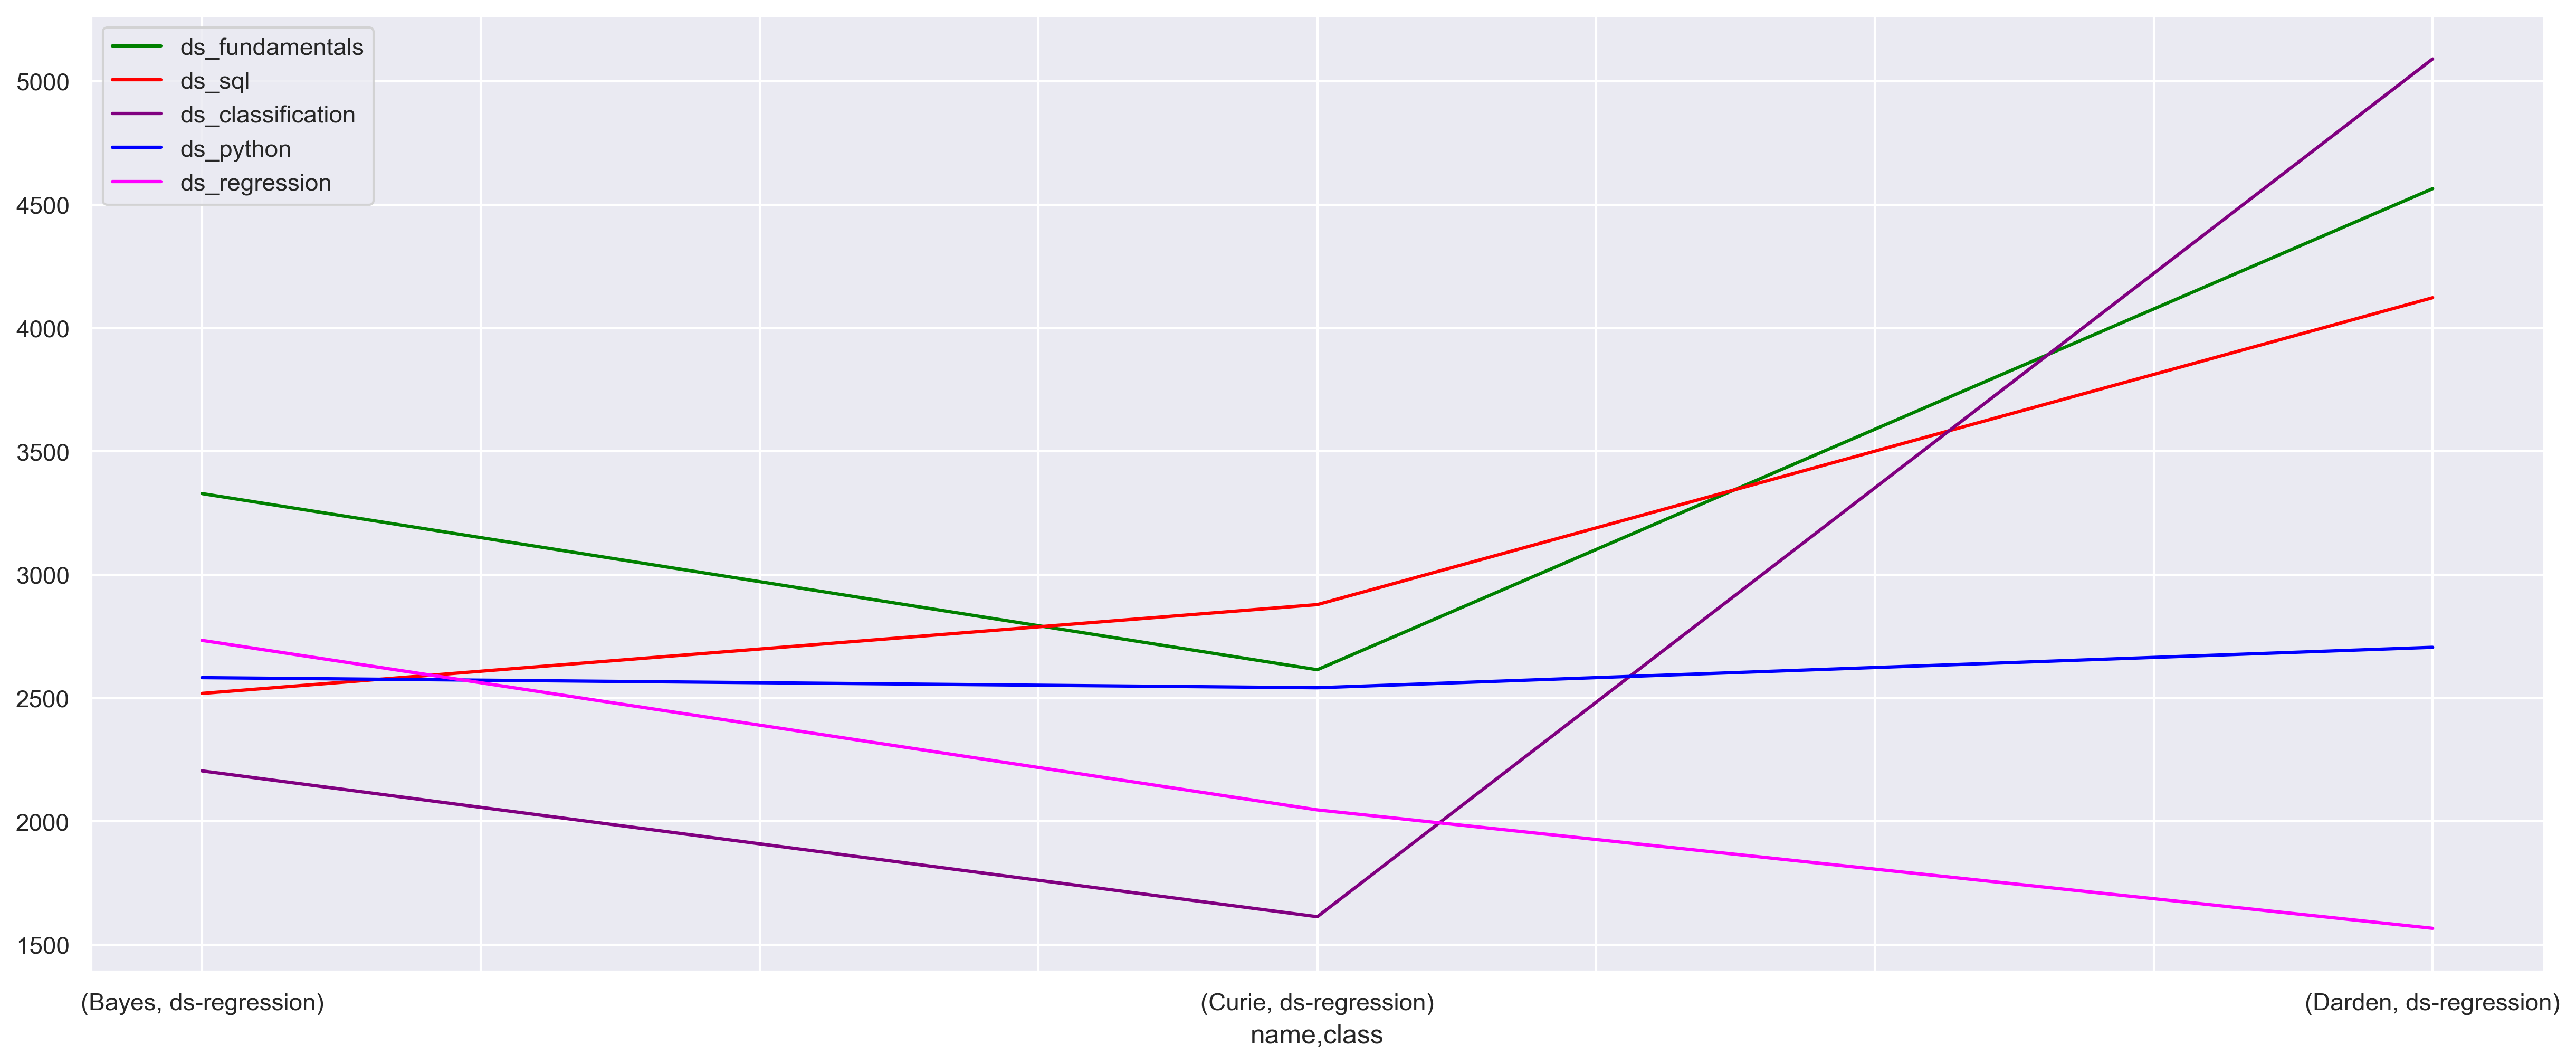

In [19]:
# viz of the top five classes in the top three cohorts

ds1[ds1['class'] == 'ds-fundamentals'].groupby('name')['class'].value_counts().plot(figsize=(20,8),color = 'green', label = "ds_fundamentals")
ds1[ds1['class'] == 'ds-sql'].groupby('name')['class'].value_counts().plot(color = 'red', label = "ds_sql")
ds1[ds1['class'] == 'ds-classification'].groupby('name')['class'].value_counts().plot(color = 'purple', label = "ds_classification")
ds1[ds1['class'] == 'ds-python'].groupby('name')['class'].value_counts().plot(color = 'blue', label = "ds_python")
ds1[ds1['class'] == 'ds-regression'].groupby('name')['class'].value_counts().plot(color = 'magenta', label = "ds_regression")

# plt.title("Classification Holds the Biggest Angle") ? 
plt.legend()
plt.show()

**``Observation: From the line chart, we can see classification has the biggest angle``**

In [20]:
# By the Numbers: DS Classification

ds1[ds1['class'] == 'ds-classification'].groupby('name')['class'].value_counts()

name    class            
Bayes   ds-classification    2205
Curie   ds-classification    1614
Darden  ds-classification    5091
Name: class, dtype: int64

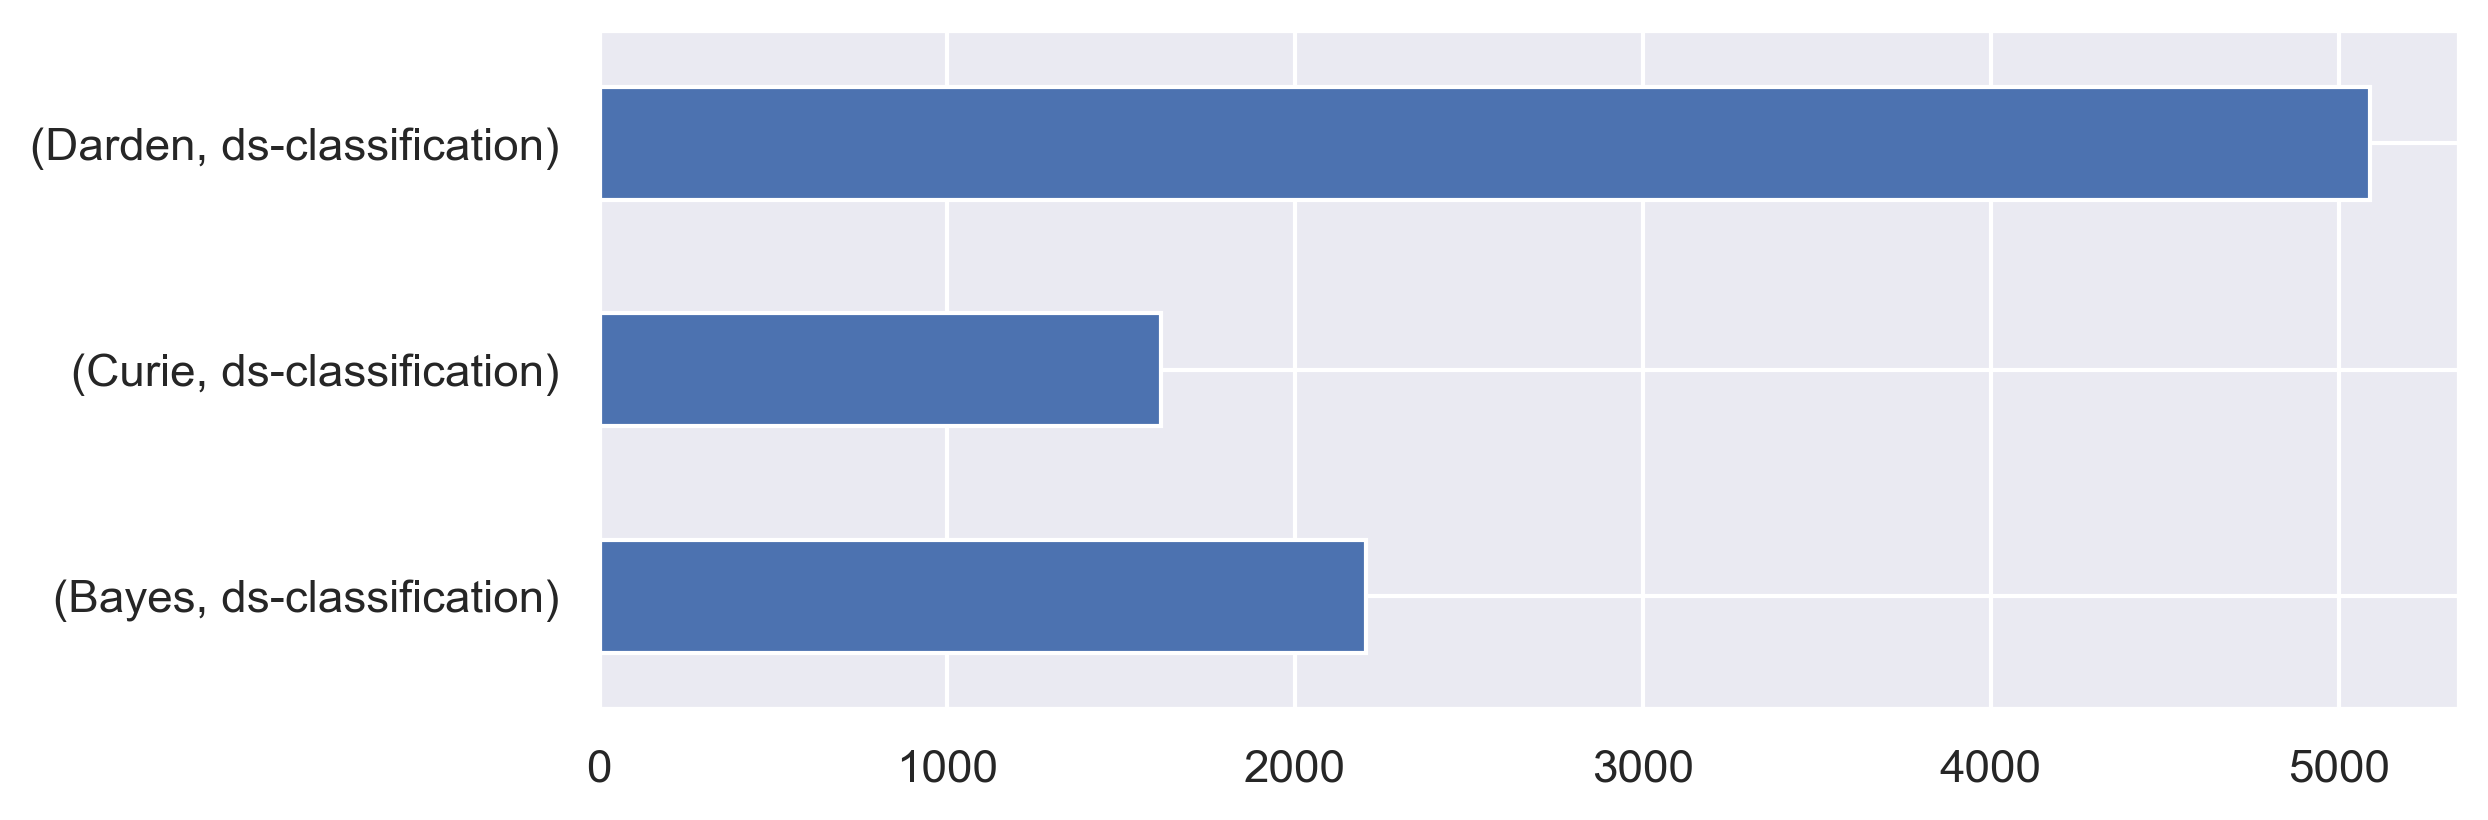

In [21]:
# classification by Cohort

plt.figure(figsize=(8, 3))

ds1[ds1['class'] == 'ds-classification'].groupby('name')['class'].value_counts().plot.barh()

# plt.title() ?
plt.ylabel(None)
plt.show()

In [22]:
# calculating difference 

round((5091/1614), 3), round((5091/2205), 3)

(3.154, 2.309)

**``Observation: Darden referred classification the most. 3.15 times more than Curie and 2.31 times more than Bayes``**

----
#### <u>``Full Stack PHP Program:``</u>

In [23]:
# creting the PHP dataframe
fs_php = df[df.program_id == 1]

# use top two cohorts due to imbalanced value counts
fs_php1 = fs_php[(fs_php.name == 'Lassen') | (fs_php.name == 'Arches')]
fs_php1.name.value_counts()

Lassen    9587
Arches    8890
Name: name, dtype: int64

In [24]:
# selecting the top 5 classes for comparison

fs_php1['class'].value_counts().head(5)

javascript-i    2339
spring          2018
html-css        1802
mysql           1622
java-iii        1579
Name: class, dtype: int64

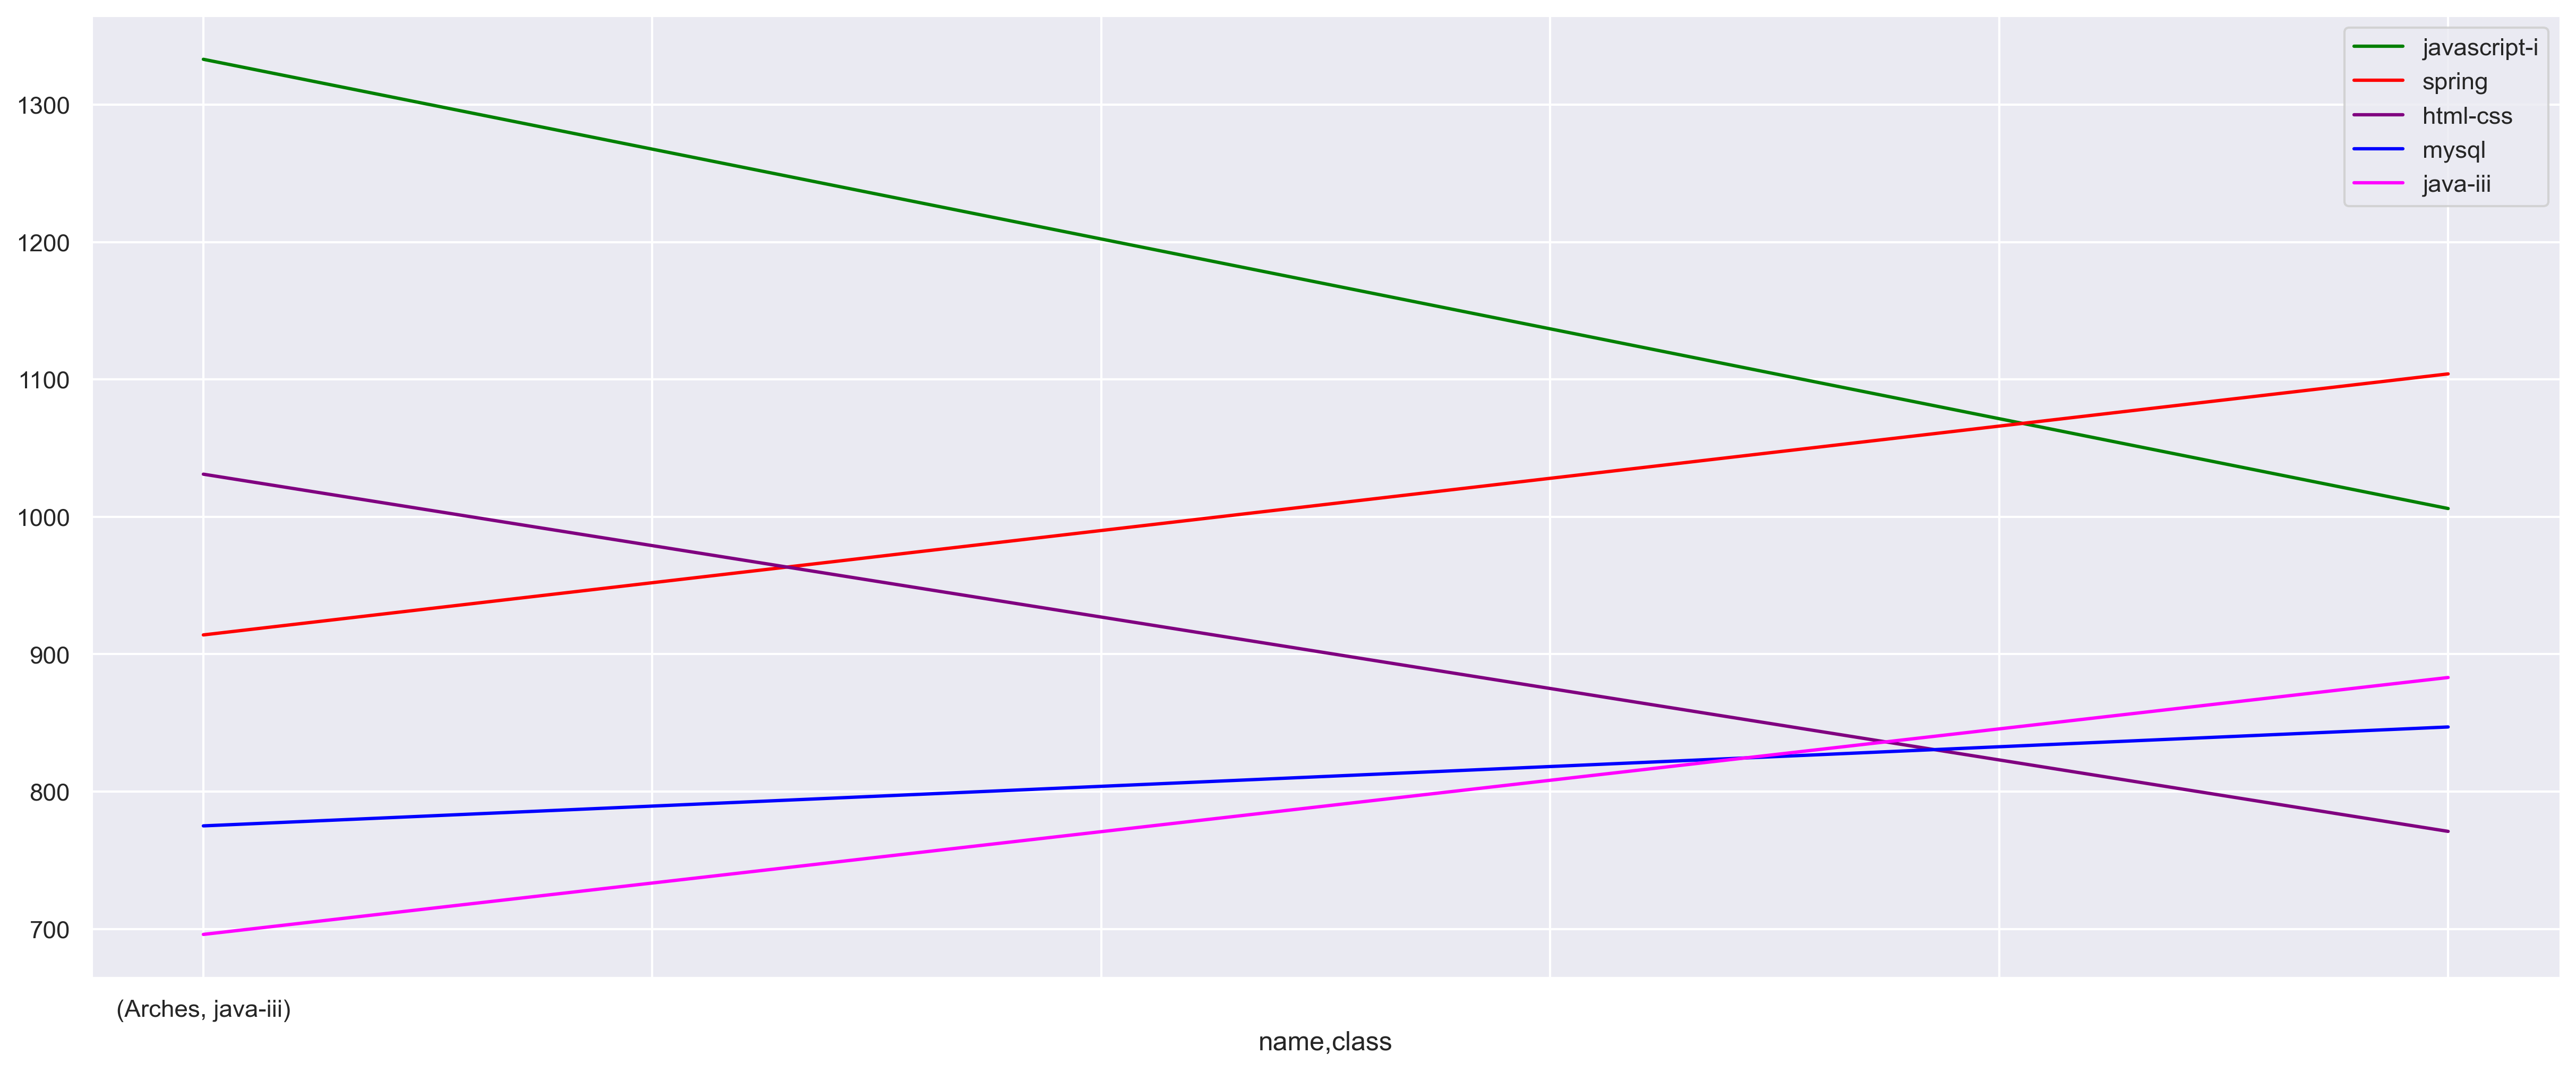

In [25]:
# visualizing the top five classes

fs_php1[fs_php1['class'] == 'javascript-i'].groupby('name')['class'].value_counts().plot(figsize=(20,8),color = 'green', label = 'javascript-i')
fs_php1[fs_php1['class'] == 'spring'].groupby('name')['class'].value_counts().plot(color = 'red', label = 'spring')
fs_php1[fs_php1['class'] == 'html-css'].groupby('name')['class'].value_counts().plot(color = 'purple', label = 'html-css')
fs_php1[fs_php1['class'] == 'mysql'].groupby('name')['class'].value_counts().plot(color = 'blue', label = 'mysql')
fs_php1[fs_php1['class'] == 'java-iii'].groupby('name')['class'].value_counts().plot(color = 'magenta', label = 'java-iii')

# is the chart missing x-axis labels?
# plt.title()?
plt.legend()
plt.show()

Observation: Not much difference between the two cohorts (Arches & Lessen) across the top five accessed classes.

----
#### <u>``Full Stack Java:``</u>

In [26]:
# creating the Java dataframe 

fs_java = df[df.program_id == 2]

# choose the cohorts have the top 5 value
fs_java1 = fs_java[(fs_java.name == 'Ceres') | (fs_java.name == 'Zion') | (fs_java.name == 'Jupiter')|
                   (fs_java.name == 'Fortuna')| (fs_java.name == 'Voyageurs')]
fs_java1.name.value_counts()

Ceres        40730
Zion         38096
Jupiter      37109
Fortuna      36902
Voyageurs    35636
Name: name, dtype: int64

In [27]:
# unique class values and count

fs_java1['class'].value_counts().head()

javascript-i    28386
mysql           22493
html-css        21204
java-ii         15705
java-iii        15497
Name: class, dtype: int64

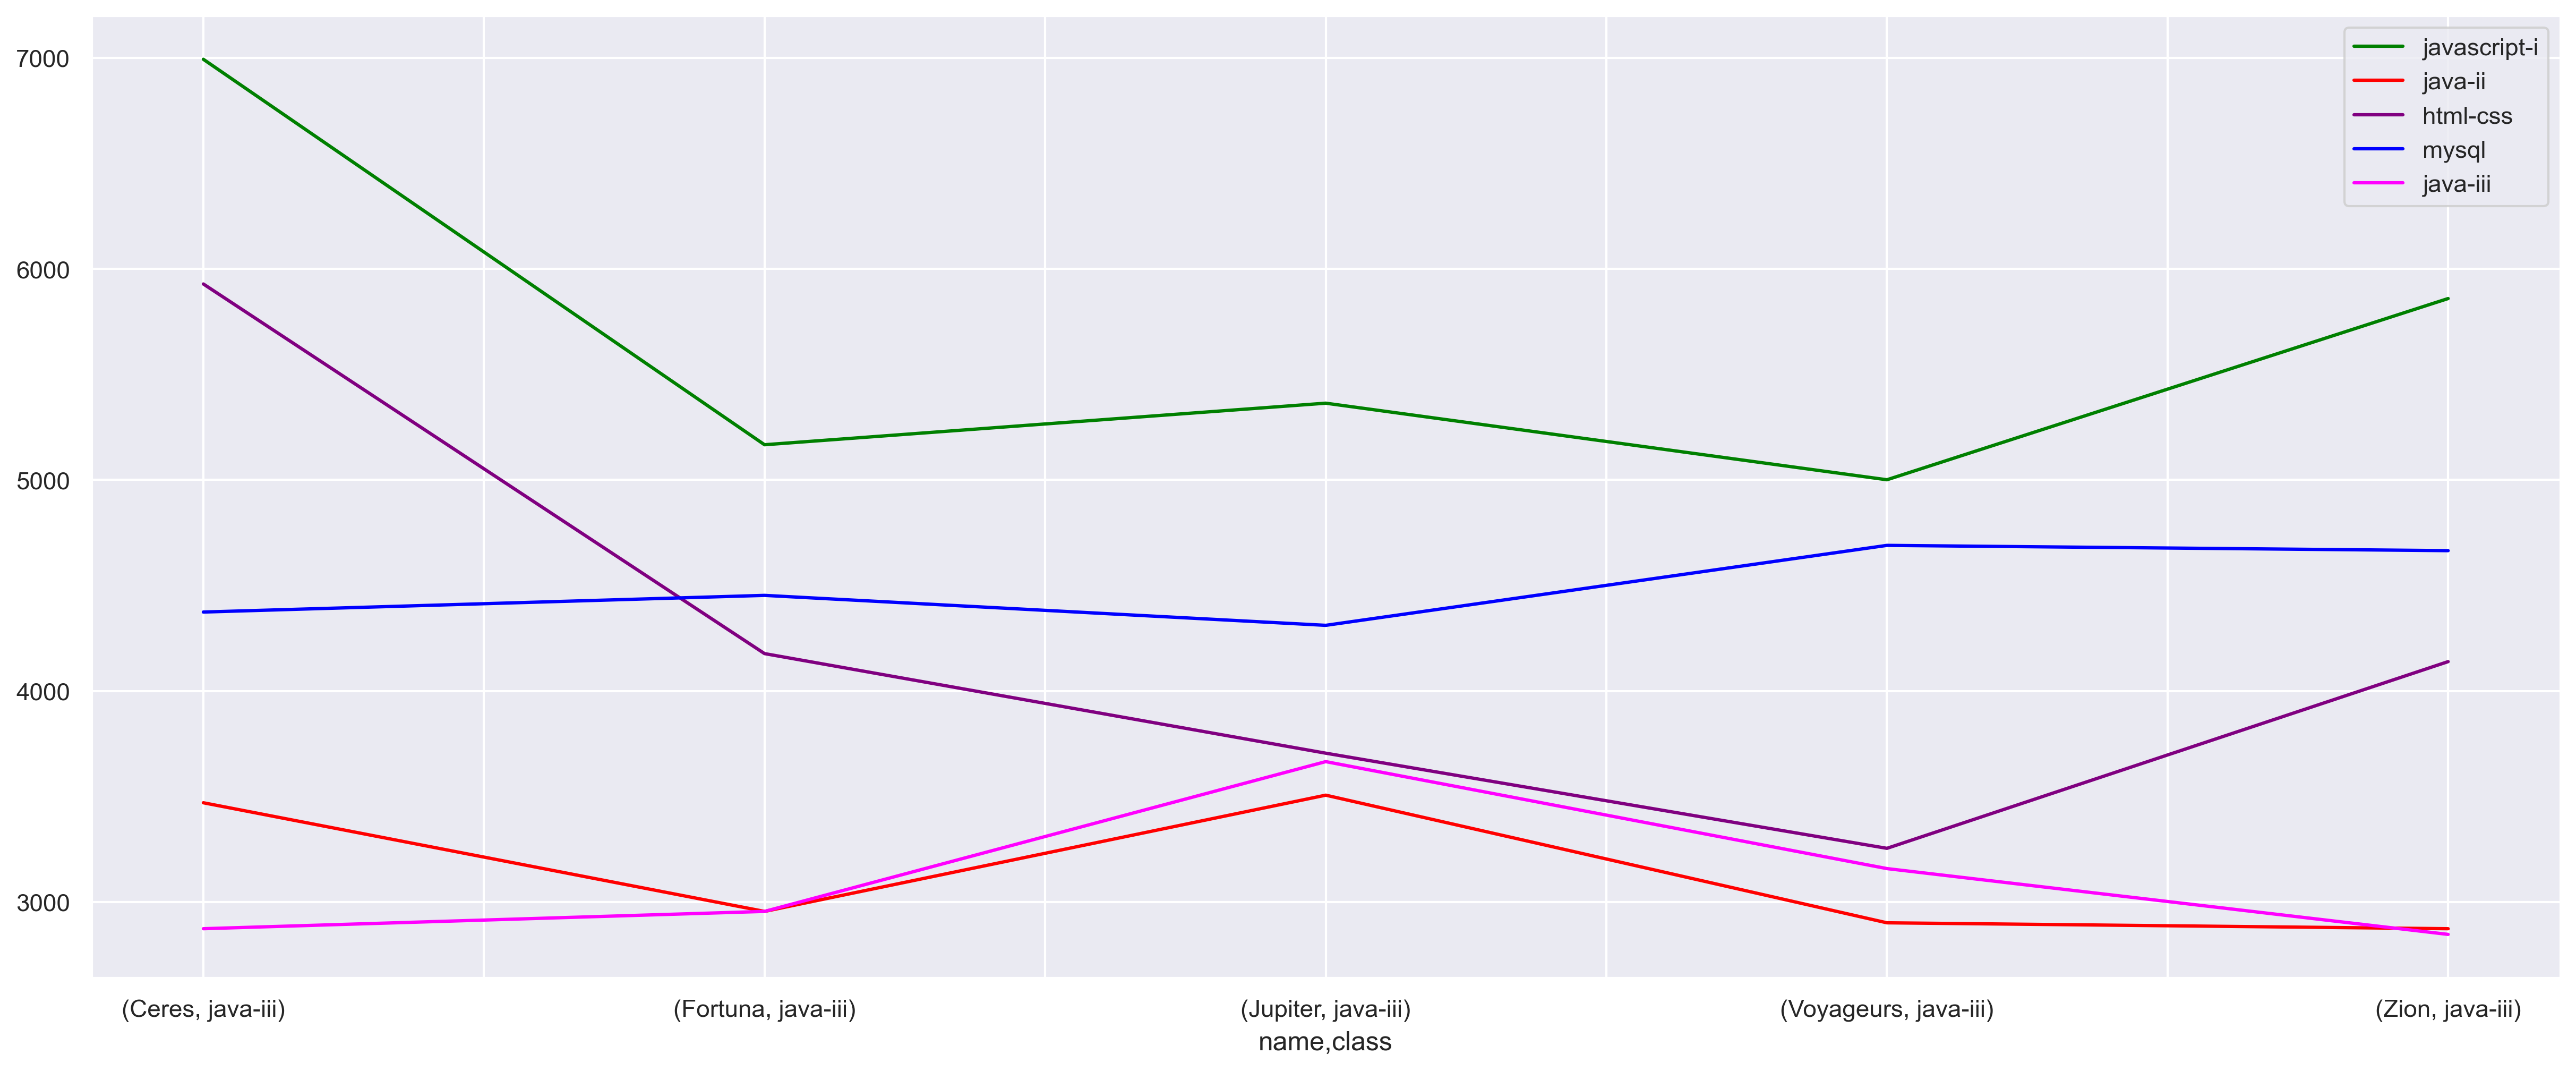

In [28]:
# vizualizing the top five classes

fs_java1[fs_java1['class'] == 'javascript-i'].groupby('name')['class'].value_counts().plot(figsize=(20,8),color = 'green', label = 'javascript-i')
fs_java1[fs_java1['class'] == 'java-ii'].groupby('name')['class'].value_counts().plot(color = 'red', label = 'java-ii')
fs_java1[fs_java1['class'] == 'html-css'].groupby('name')['class'].value_counts().plot(color = 'purple', label = 'html-css')
fs_java1[fs_java1['class'] == 'mysql'].groupby('name')['class'].value_counts().plot(color = 'blue', label = 'mysql')
fs_java1[fs_java1['class'] == 'java-iii'].groupby('name')['class'].value_counts().plot(color = 'magenta', label = 'java-iii')

# plt.title() ?
plt.legend()
plt.show()

Observation: Html-css class has the biggest difference.

In [29]:
fs_java1[fs_java1['class'] == 'html-css'].groupby('name')['class'].value_counts()

name       class   
Ceres      html-css    5929
Fortuna    html-css    4177
Jupiter    html-css    3705
Voyageurs  html-css    3254
Zion       html-css    4139
Name: class, dtype: int64

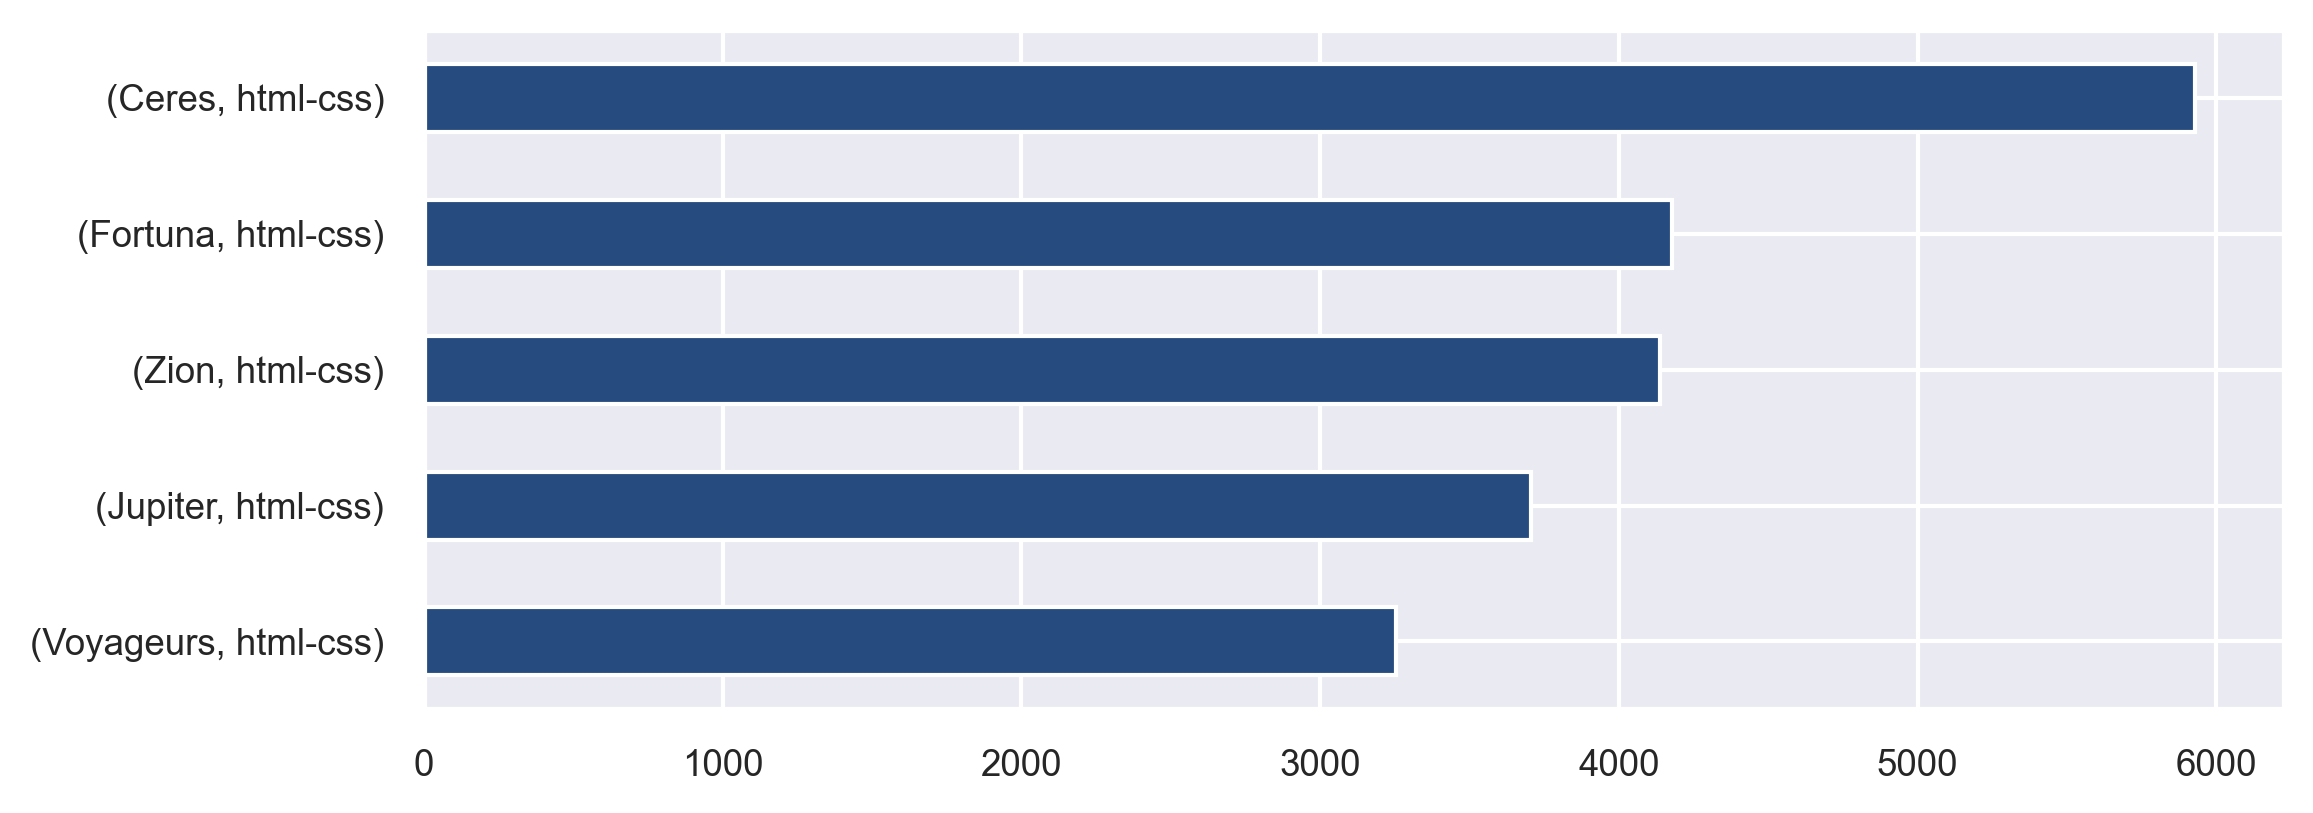

In [30]:
# plotting Html-css Lesson/Class Visits by Cohort

plt.figure(figsize= (8,3))
sns.set(font_scale = .8, palette = "crest_r")

fs_java1[fs_java1['class'] == 'html-css'].groupby('name')['class'].value_counts().sort_values().plot.barh()

plt.ylabel(None)
# pl.title() ?
plt.show()

In [31]:
# summary calulation 

round((5929/3254), 3)

1.822

Observation: Ceres referred html-css the most. 1.8 times more than Voyageurs.


### **<u>``Cohort Exploration: Analysis & Insights:``</u>**

1. For Data Sience program, Darden referred classification lesson a lot more than other cohorts. 
2. For Full Stack JAVA program, Ceres referred html-css class tha most.

----

## ``Student Usage: Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?``

<u>**Highlights:**</u>

- Here I will use Bollinder Bands to detect the unusual page view. Then find out the individual. 


### ``Appendix:``

In [32]:
# Full Stack PHP
print('Post Graduation: Full Stack: PHP')
prepare_final.value_counts_and_frequencies(grad_df[grad_df["program_type"] == 'FS_PHP_program']["class"])

Post Graduation: Full Stack: PHP


,Count,Percentage
content,6397,0.22
javascript-i,3708,0.13
html-css,2463,0.09
spring,2324,0.08
mysql,2070,0.07
java-iii,1953,0.07


In [33]:
# Full-Stack Java Program
print('Post Graduation:: Full Stack: Java')
prepare_final.value_counts_and_frequencies(grad_df[grad_df["program_type"] == 'FS_JAVA_program']["class"])

Post Graduation:: Full Stack: Java


,Count,Percentage
javascript-i,15442,0.11
spring,15204,0.10
html-css,12033,0.08
mysql,11927,0.08
appendix,9785,0.07
java-iii,9513,0.07


In [34]:
# Data Science Program
print('Post Graduation:: Data Science')
prepare_final.value_counts_and_frequencies(grad_df[grad_df["program_type"] == 'DS_program']["class"])

Post Graduation:: Data Science


,Count,Percentage
ds-sql,1554,0.15
ds-fundamentals,1520,0.15
ds-classification,1316,0.13
ds-python,845,0.08
ds-regression,710,0.07
ds-anomaly-detection,628,0.06


In [35]:
# Front End Program
print('Post Graduation:: Front End')
prepare_final.value_counts_and_frequencies(grad_df[grad_df["program_type"] == 'Fron_End_program']["class"])

Post Graduation:: Front End


,Count,Percentage
